# Importing all required libraries

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import cm
from matplotlib import pyplot as plt
from datetime import datetime
import math as math
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import seaborn as sns

matplotlib.rcParams['axes.facecolor'] = 'black'
matplotlib.rcParams['figure.facecolor'] = 'black'
matplotlib.rcParams['axes.grid'] = False
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = 'Arial'
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['font.weight'] = 'bold'
matplotlib.rcParams['text.color'] = 'white'
matplotlib.rcParams['xtick.color'] = 'white'
matplotlib.rcParams['ytick.color'] = 'white'
matplotlib.rcParams['axes.labelcolor'] = 'white'
matplotlib.rcParams['axes.labelweight'] = 'bold'


# Part I. Data Collection :


> #### US Accident Data : *provides data regarding accidents that have taken place across the contiguous United States*


Attribute |Description
--- |         --- 
***Traffic Attributes (12)*** 🚦
ID | A unique identifier of the accident record | No
Source |Indicates source of the accident report (i.e. the API which reported the accident) | No
TMC |  A traffic accident may have a Traffic Message Channel (TMC) code which provides more detailed description of the event | Yes
Severity | Shows severity of the accident on a scale of 1-4 (1 indicates the least impact on traffic and 4 indicates a significant impact on traffic | No
Start_Time |  Shows start time of the accident in the local time zone | No
End_Time |Shows end time of the accident in the local time zone | No
Start_Lat | Shows latitude in GPS coordinate of the start point | No
Start_Lng | Shows longitude in GPS coordinate of the start point | No
End_Lat |  Shows latitude in GPS coordinate of the end point | Yes
End_Lng | Shows longitude in GPS coordinate of the end point | Yes
Distance(mi) | The length of the road extent affected by the accident | No
Description |  Shows natural language description of the accident | No
***Address Attributes (9)*** 🏠
Number | Shows the street number in address field | Yes
Street |  Shows the street name in address field | Yes
Side |  Shows the relative side of the street (Right/Left) in address field | Yes
City | Shows the city in address field | Yes
County |Shows the county in address field | Yes
State | Shows the state in address field | Yes
Zipcode |  Shows the zipcode in address field | Yes
Country |  Shows the country in address field | Yes
Timezone |  Shows timezone based on the location of the accident (eastern, central, etc.) | Yes
***Weather Attributes (11)*** 🌤 
Airport_Code |  Denotes an airport-based weather station which is the closest one to location of the accident | Yes
Weather_Timestamp | Shows the time-stamp of weather observation record (in local time) | Yes
Temperature(F) | Shows the time-stamp of weather observation record in local time | Yes
Wind_Chill(F) |  Shows the wind chill in Fahrenheit | Yes
Humidity(%) |  Shows the humidity in percentage | Yes
Pressure(in) |  Shows air pressure in inches | Yes
Visibility(mi) |  Shows visibility in miles  | Yes
Wind_Direction |  Shows wind direction | Yes
Wind_Speed|  Shows wind speed in miles per hour | Yes
Precipitation(in) |  Shows precipitation amount in inches | Yes
Weather_Condition | Shows the weather condition (rain, snow, thunderstorm, fog, etc.) | Yes
***Point of Interest (POI) Attributes (13)*** 🚉
Amenity |  A POI annotation which indicates presence of amenity in a nearby location | No
Bump |  A POI annotation which indicates presence of speed bump or hump in a nearby location | No
Crossing |  A POI annotation which indicates presence of crossing  in a nearby location | No
Give_Way |  A POI annotation which indicates presence of giveway sign in a nearby location | No
Junction |  A POI annotation which indicates presence of junction in a nearby location | No
No_Exit |  A POI annotation which indicates presence of no exit sign in a nearby location | No
Railway |  A POI annotation which indicates presence of railway in a nearby location | No
Roundabout |  A POI annotation which indicates presence of roundabout in a nearby location | No
Station |  A POI annotation which indicates presence of station (bus, train, etc.) in a nearby location | No
Stop |  A POI annotation which indicates presence of stop sign in a nearby location | No
Traffic_Calming |  A POI annotation which indicates presence of traffic calming means in a nearby location | No
Traffic_Signal | A POI annotation which indicates presence of traffic signal in a nearby location | No
Turning_Loop |  A POI annotation which indicates presence of turning loop in a nearby location | No
***Period-of-day Attributes(4***) 🌄
Sunrise_Sunset | Shows the period of day (i.e. day or night) based on sunrise/sunset | Yes
Civil_Twilight |  Shows the period of day (i.e. day or night) based on civil twilight | Yes
Nautical_Twilight |  Shows the period of day (i.e. day or night) based on nautical twilight | Yes
Astronomical_Twilight |  Shows the period of day (i.e. day or night) based on astronomical twilight | Yes


!kaggle datasets download -d sobhanmoosavi/us-accidents 
! unzip us-accidents.zip -d accidents

In [ ]:
# Read accident data 
acc_data= pd.read_csv("/kaggle/input/us-accidents/US_Accidents_Dec21_updated.csv")
acc_data.sample(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2760936,A-2760937,3,2017-08-03 23:38:51,2017-08-04 05:38:51,30.332720,-97.704020,30.334872,-97.702655,0.170,At US-183/Exit 239/Exit 240 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
178024,A-178025,4,2017-04-24 15:38:45,2017-04-24 21:38:45,43.380034,-73.258469,43.393270,-73.263160,0.944,Closed at RT-149/CR-26 - Road closed due to ac...,...,False,False,False,False,False,False,Day,Day,Day,Day
2056658,A-2056659,2,2020-11-02 04:40:59.000000000,2020-11-02 07:02:21.000000000,46.636651,-114.581662,46.688351,-114.556582,3.765,Incident on US-12 near LOLO CREEK RD Expect de...,...,False,False,False,False,False,False,Night,Night,Night,Night
1395810,A-1395811,2,2021-12-18 20:27:00,2021-12-18 21:45:00,34.472022,-92.737771,34.490094,-92.714123,1.837,Stationary traffic on I-30 E from US-270/Georg...,...,False,False,False,False,False,False,Night,Night,Night,Night
61233,A-61234,2,2016-09-24 13:16:28,2016-09-24 19:16:28,41.942729,-87.716379,41.939708,-87.709124,0.427,Between Addison St/Exit 45A and Belmont Ave/Ex...,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
# check the no. of columns & rows
print('The Dataset Contains, Rows: {:,d} & Columns: {}'.format(acc_data.shape[0], acc_data.shape[1]))

The Dataset Contains, Rows: 2,845,342 & Columns: 47


> #### US Census Demographic Data : *contains information regarding the population of each state and county in the United States*

--------------------------***This data will be used to standardize the analysis of the occurrence of accidents across different sized states*** ------------------------

Attribute  | Description 
--- |  ---
State |  Name of one of the 52 states of America, or DC or Puerto Rico | No
County | Name of the county or county equivalent | No
TotalPopulation | Total population of the county | No
Drive |  Percentage of the county’s population commuting alone in a car, van, or truck  | No
Transit |  Percentage of the county’s population commuting on public transport | No
MeanCommute |Mean commute time in minutes | No
Poverty | Percentage of the county’s population under the level of poverty | No


In [ ]:
# Read US Census dataset
url = "https://github.com/pard187/pard187.github.io/raw/master/US_Census/acs2017_county_data.csv"
pop_data = pd.read_csv(url)
pop_data = pop_data[['State','County','TotalPop','Drive','Transit','MeanCommute','Poverty']]
pop_data.sample(5)

,State,County,TotalPop,Drive,Transit,MeanCommute,Poverty
2076,Ohio,Harrison County,15397,81.7,0.1,28.3,15.7
1901,North Carolina,Burke County,88898,85.6,0.2,21.5,19.3
1520,Missouri,Gentry County,6688,77.1,0.4,21.5,18.1
2321,South Carolina,Barnwell County,21788,87.0,0.3,27.6,27.0
572,Idaho,Fremont County,12889,78.4,1.0,25.9,11.9


In [ ]:
# check the no. of columns & rows
print('The Dataset Contains, Rows: {:,d} & Columns: {}'.format(pop_data.shape[0], pop_data.shape[1]))

The Dataset Contains, Rows: 3,220 & Columns: 7


# Part II. Data Preparation 


***Datatype Conversions***



In [ ]:
# convert the Start_Time & End_Time Variable into Datetime Feature
acc_data.Start_Time = pd.to_datetime(acc_data.Start_Time)
acc_data.End_Time = pd.to_datetime(acc_data.End_Time)

***Adding new columns***

In [ ]:
acc_data['Duration(min)'] = (acc_data['End_Time'] - acc_data['Start_Time']).astype('timedelta64[m]')
acc_data['Start_Hour'] = (acc_data['Start_Time']).dt.hour
acc_data['Day'] = (acc_data['Start_Time']).dt.weekday
acc_data['Month'] = acc_data['Start_Time'].dt.month
acc_data['Year'] = acc_data['Start_Time'].dt.year
# Weekend column where 1 = weekend, 0 = weekday
#acc_data['Weekend'] = acc_data['Day'] <= 5
acc_data['Weekend'] = acc_data['Day'].map({0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 1})

***Data Quality Analysis***

In [ ]:
# Check for missing values
acc_data.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

*The attributes that contain the most null instances: Number, Wind_Chill(F), Wind_Speed(mph) and Precipitation(in)*

***Removing redundant Columns***

1.    Wind_Chill(F) is highly correlated to Temperature(F) 
2.    Weather_Timestamp, Start_Time and End_Time, whose information has been extracted into the more relevant attributes: Duration, Day, and Start_Hour.
1.   Nautical_Twilight, Astronomical_Twilight, and Civil_Twilight whose information is reflected in the attribute Sunrise_Sunset
2.   State and City  are used to analyze trends in different regions. Other geographical attributes  Country, Street, Side, Zipcode, Timezone, and Airport_Code can be removed
1.  Other irrelevant columns  like Description ,'End_Lat','End_Lng',and wind direction can also be dropped.

In [ ]:
data = acc_data.drop(columns = ['Start_Time','End_Time','End_Lat','End_Lng','Number','Street','Side','Zipcode','Timezone','Country','Airport_Code','Weather_Timestamp','Nautical_Twilight','Astronomical_Twilight','Civil_Twilight']);
data.head()

,ID,Severity,Start_Lat,Start_Lng,Distance(mi),Description,City,County,State,Temperature(F),...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Duration(min),Start_Hour,Day,Month,Year,Weekend
0,A-1,3,40.108910,-83.092860,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,Dublin,Franklin,OH,42.1,...,False,False,False,Night,360.0,0,0,2,2016,0
1,A-2,2,39.865420,-84.062800,0.747,At OH-4/OH-235/Exit 41 - Accident.,Dayton,Montgomery,OH,36.9,...,False,False,False,Night,360.0,5,0,2,2016,0
2,A-3,2,39.102660,-84.524680,0.055,At I-71/US-50/Exit 1 - Accident.,Cincinnati,Hamilton,OH,36.0,...,False,False,False,Night,360.0,6,0,2,2016,0
3,A-4,2,41.062130,-81.537840,0.123,At Dart Ave/Exit 21 - Accident.,Akron,Summit,OH,39.0,...,False,False,False,Night,360.0,6,0,2,2016,0
4,A-5,3,39.172393,-84.492792,0.500,At Mitchell Ave/Exit 6 - Accident.,Cincinnati,Hamilton,OH,37.0,...,False,False,False,Day,360.0,7,0,2,2016,0


***Filling Null Values***

In [ ]:
# percentage of Null values
(data.isna().sum()/data.shape[0]) *100

ID                    0.000000
Severity              0.000000
Start_Lat             0.000000
Start_Lng             0.000000
Distance(mi)          0.000000
Description           0.000000
City                  0.004815
County                0.000000
State                 0.000000
Temperature(F)        2.434646
Wind_Chill(F)        16.505678
Humidity(%)           2.568830
Pressure(in)          2.080593
Visibility(mi)        2.479350
Wind_Direction        2.592834
Wind_Speed(mph)       5.550967
Precipitation(in)    19.310789
Weather_Condition     2.482514
Amenity               0.000000
Bump                  0.000000
Crossing              0.000000
Give_Way              0.000000
Junction              0.000000
No_Exit               0.000000
Railway               0.000000
Roundabout            0.000000
Station               0.000000
Stop                  0.000000
Traffic_Calming       0.000000
Traffic_Signal        0.000000
Turning_Loop          0.000000
Sunrise_Sunset        0.100761
Duration


*   2.4% of Temperature are NaN --> fill with mean temp
*   19.3% of Precipitation are NaN --> fill with 0, meaning no rain
*   2.5% of Humidity are NaN --> fill with mean
*   2.0% of Pressure are NaN --> fill with mean
*   2% of visibility are NaN --> Fill with mean 
*   16% of Wind Speed are NaN --> fill with mean
*   2% of Weather Condition are NaN --> Drop these rows
*   0.1% of Sunrise_Sunset are NaN --> Drop  these rows
*   0.004% of city are Nan --> Drop  these rows 

In [ ]:
data['Temperature(F)'] = data['Temperature(F)'].fillna(data['Temperature(F)'].mean())
data['Precipitation(in)'] = data['Precipitation(in)'].fillna(0)
data['Humidity(%)'] = data['Humidity(%)'].fillna(data['Humidity(%)'].mean())
data['Pressure(in)'] = data['Pressure(in)'].fillna(data['Pressure(in)'].mean())
data['Visibility(mi)'] = data['Visibility(mi)'].fillna(data['Visibility(mi)'].mean())
data['Wind_Speed(mph)'] = data['Wind_Speed(mph)'].fillna(data['Wind_Speed(mph)'].mean())
data = data[data['Weather_Condition'].notna()]
data = data[data['Sunrise_Sunset'].notna()]
data = data[data['City'].notna()]

***Converting boolean columns into 0 and 1***

In [ ]:
boolean_cols = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway','Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal','Turning_Loop', 'Weekend']
data[boolean_cols] = (data[boolean_cols] == True).astype(int)
#Sunrise_Sunset have Day or Night values. Convert them into 0 and 1's.
data['Sunrise_Sunset'] = data['Sunrise_Sunset'].map(dict(Day=0, Night=1))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772450 entries, 0 to 2845341
Data columns (total 38 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ID                 object 
 1   Severity           int64  
 2   Start_Lat          float64
 3   Start_Lng          float64
 4   Distance(mi)       float64
 5   Description        object 
 6   City               object 
 7   County             object 
 8   State              object 
 9   Temperature(F)     float64
 10  Wind_Chill(F)      float64
 11  Humidity(%)        float64
 12  Pressure(in)       float64
 13  Visibility(mi)     float64
 14  Wind_Direction     object 
 15  Wind_Speed(mph)    float64
 16  Precipitation(in)  float64
 17  Weather_Condition  object 
 18  Amenity            int64  
 19  Bump               int64  
 20  Crossing           int64  
 21  Give_Way           int64  
 22  Junction           int64  
 23  No_Exit            int64  
 24  Railway            int64  
 25  Roundabout        

# Part III: Exploratory Data Analysis

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=1MUmlmWazOcCyU7m30AwZuDKaoeZ2Gizi" align="left" hspace="25px" vspace="20px" width="50" height="60" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Yu Mincho Demibold;font-size:25px;font-style: italic;color:  #6468e8">Mapping the Mayhem: A region-based analysis of accident hotspots</li>
</ul>






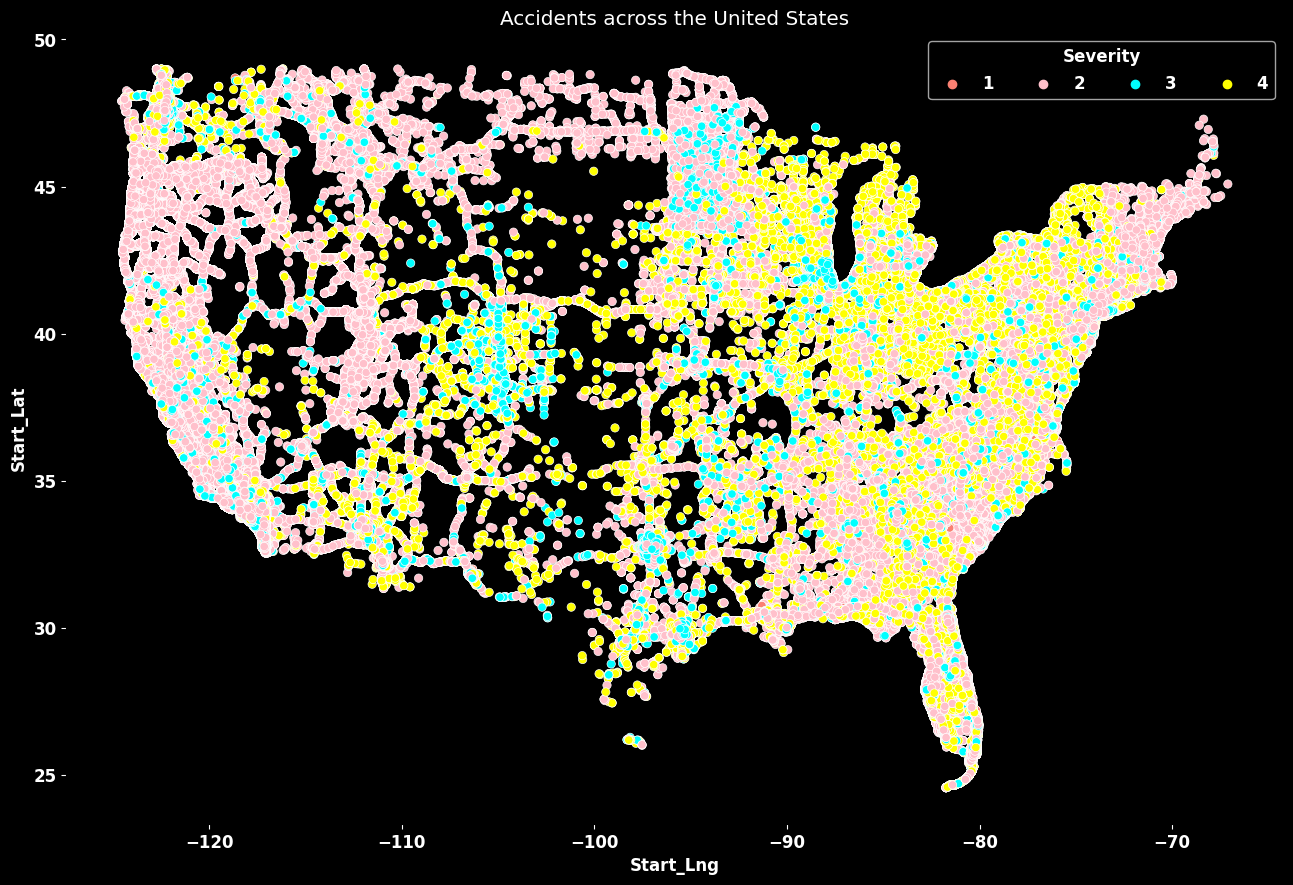

In [ ]:
fig, ax = plt.subplots(figsize=(15.7,10.27))
sns.scatterplot(x = 'Start_Lng',y = 'Start_Lat',data = data, hue = 'Severity',palette=['salmon','pink','cyan','yellow']).set_title('Accidents across the United States')
ax.legend(title='Severity', loc='upper right', ncol=4)

![picture](https://i.redd.it/8gjt1jc0blt01.png)

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">Insights:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li> From the above graphs, we could see that,the accidents, and the <span style="font-weight: bold; color:#456dcc;"> Level 4 (Fatal) accidents </span>  in particular, seem to follow along the paths of the <span style="font-weight: bold; color:#456dcc;">major highways and interstates</span> in the United States.</li>
    <br>


***We will narrow our analysis to look at accident prevalency per state and city***

Text(0.5, 1.0, 'Accident Count by State')

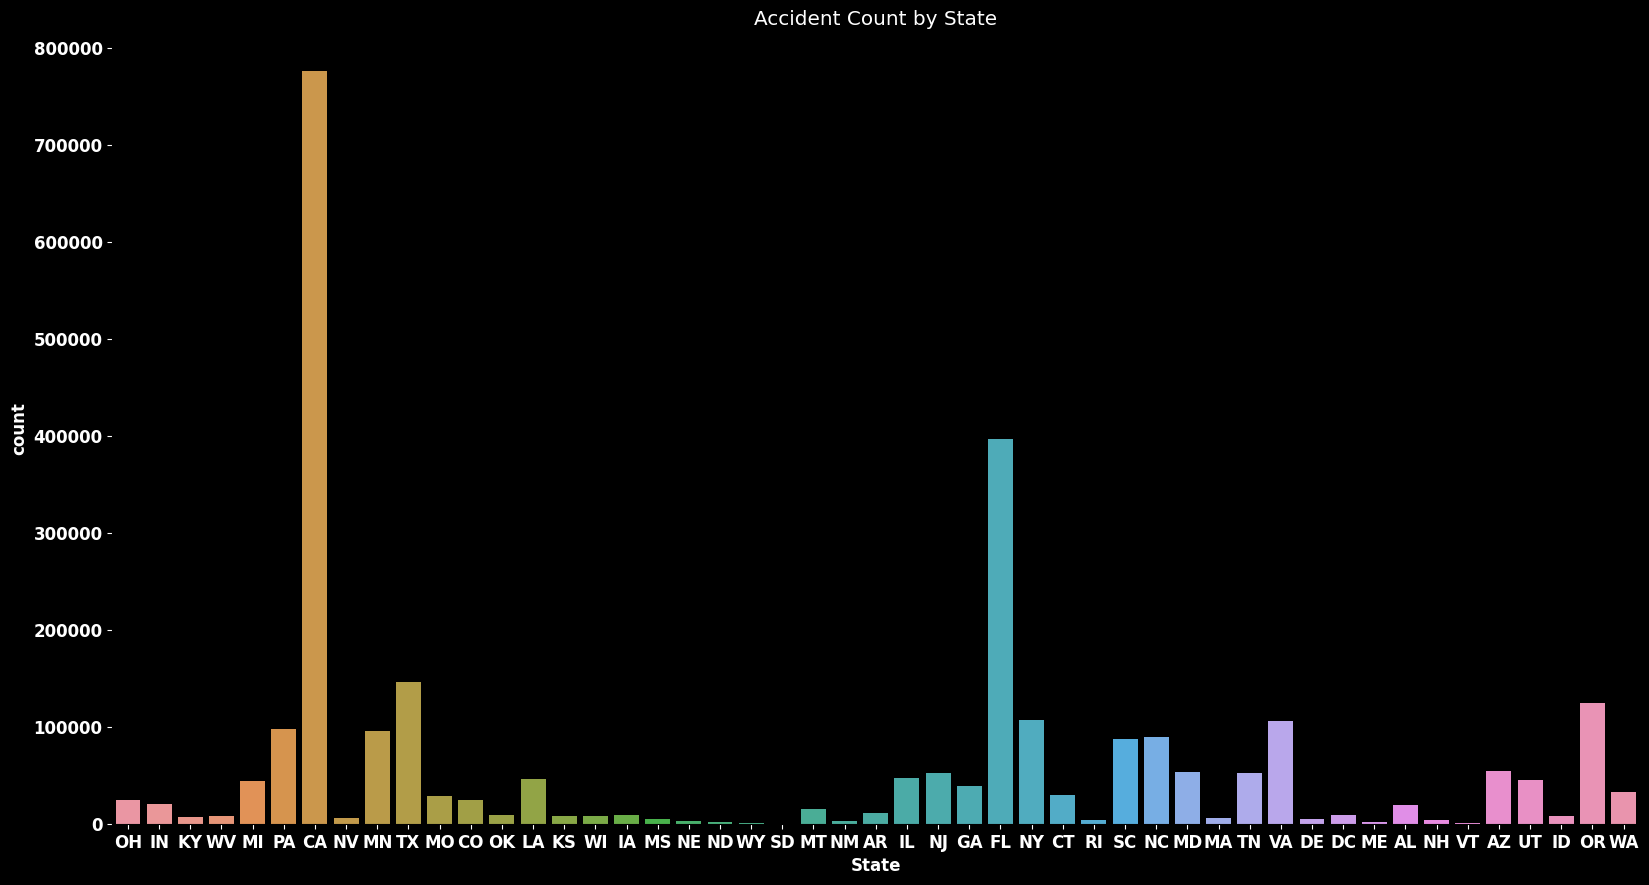

In [ ]:
fig, ax = plt.subplots(figsize=(19.7,10.27))
sns.countplot(x = "State", data = data).set_title('Accident Count by State')

***For better view, we will look at the Top 10 states with the highest numbers of accidents.***

Text(0.5, 1.0, 'Number of Accidents in Top 10 States')

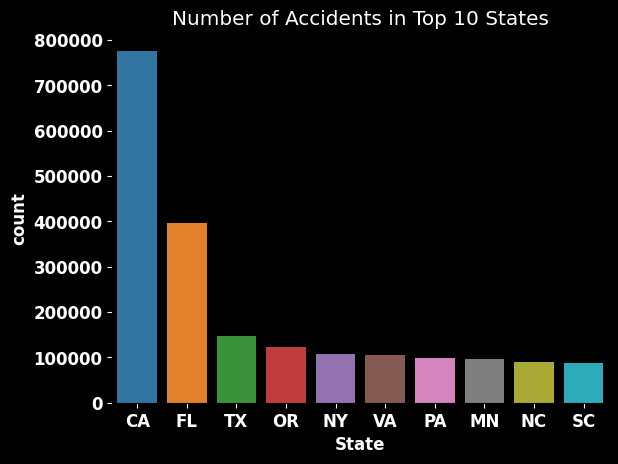

In [ ]:
sns.countplot(x = "State", data = data,order=data.State.value_counts().iloc[:10].index).set_title('Number of Accidents in Top 10 States')

[Text(0, 0, 'Miami'),
 Text(1, 0, 'Los Angeles'),
 Text(2, 0, 'Orlando'),
 Text(3, 0, 'Dallas'),
 Text(4, 0, 'Houston'),
 Text(5, 0, 'Charlotte'),
 Text(6, 0, 'Sacramento'),
 Text(7, 0, 'San Diego'),
 Text(8, 0, 'Raleigh'),
 Text(9, 0, 'Minneapolis')]

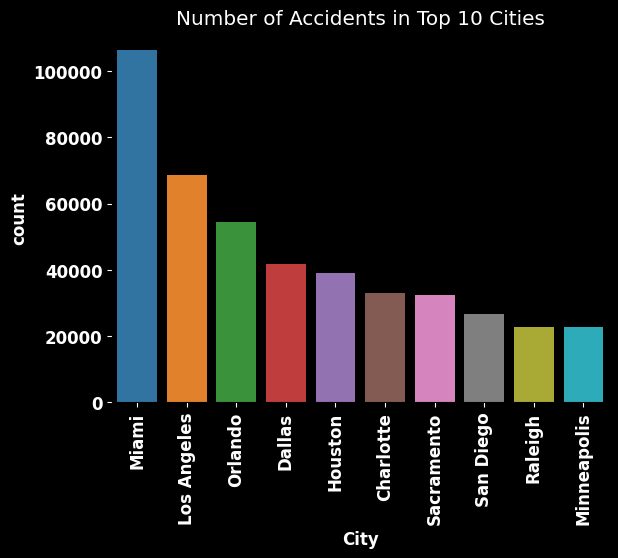

In [ ]:
sns.countplot(x = "City", data = data,order=data.City.value_counts().iloc[:10].index).set_title('Number of Accidents in Top 10 Cities')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

***Initial analysis of the data suggests that California has recorded over 800,000 accidents, a significantly higher number than the other states. Texas, with over 300,000 accidents, has the second-highest number of accidents. But following closer examination, we discover that California, Texas, and Florida are the states with the highest number of accidents. Since these states have greater populations than states with smaller populations, it is expected that we will witness more accidents in these states. We must standardize our data depending on population size to take into consideration the various population sizes so that we can evaluate whether or not this trend in accidents is caused by state policy rather than population.***

In [ ]:
#calculate total number of accidents in each state 
ta = data[['State','ID']].groupby(['State'],as_index=False).agg(['count'])
ta.columns = ta.columns.to_flat_index()
ta.reset_index(inplace=True)
ta.columns = ['_'.join(tup).rstrip('_') for tup in ta.columns.values]
ta = ta.rename(columns = {'S_t_a_t_e':'State'})
ta = ta.rename(columns = {'ID_count':'Total_Accidents'})

#calculate the total population of each state
state_pop = pop_data[['State','TotalPop']].groupby(['State']).agg(['sum'])
state_pop.columns = state_pop.columns.to_flat_index()
state_pop.reset_index(inplace=True)
state_pop.columns = ['_'.join(tup).rstrip('_') for tup in state_pop.columns.values]
state_pop = state_pop.rename(columns = {'S_t_a_t_e':'State'})
state_pop = state_pop.rename(columns = {'TotalPop_sum':'Total_Pop'})
state_pop['State'] = ['AL','AK','AZ','AR','CA','CO','CT','DE','DC','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','PR','RI','SC','SD','TE','TX','UT','VT','VA','WA','WV','WI','WY']

#merge total state population and total accidents into a single dataframe
per_tenk_df = pd.merge(ta, state_pop, on = 'State', how = 'outer')
per_tenk_df = per_tenk_df.dropna()
del(ta)
del(state_pop)

#calculate accidents per 10000 residents
per_tenk_df['Accidents_per_10000'] = np.ceil((per_tenk_df['Total_Accidents']/per_tenk_df['Total_Pop'])*1000)
per_tenk_df.head()

,State,Total_Accidents,Total_Pop,Accidents_per_10000
0,AL,19034.0,4850771.0,4.0
1,AR,10583.0,2977944.0,4.0
2,AZ,54823.0,6809946.0,9.0
3,CA,776726.0,38982847.0,20.0
4,CO,24801.0,5436519.0,5.0


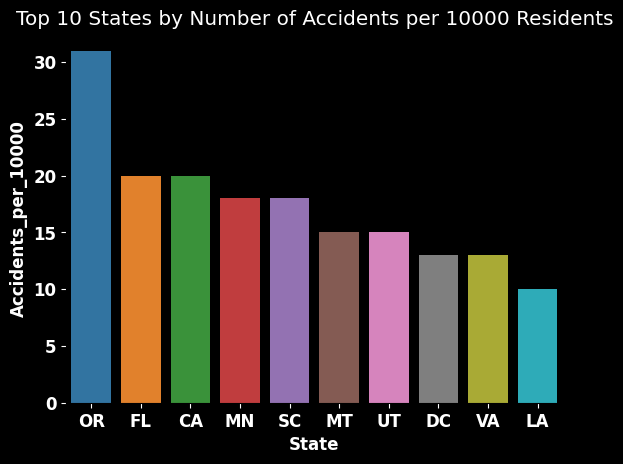

In [ ]:
sns.barplot(x="State", y='Accidents_per_10000', data=per_tenk_df, order=per_tenk_df.sort_values('Accidents_per_10000', ascending=False).head(10)['State'])
plt.title('Top 10 States by Number of Accidents per 10000 Residents')
plt.show()

***We immediately see changes in the distribution. Most significantly, California is no longer the state where accidents are most common.***


<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">Insights:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li> 1. Before Standardization, <span style="font-weight: bold; color:#456dcc;"> California </span>  is the state with highest no. of road accidents followed by  <span style="font-weight: bold; color:#456dcc;"> Florida and Texas.</span> </li>
    <br>
    <li> 2.<span style="font-weight: bold; color:#456dcc;"> Miami </span>  is the City with highest no. of road accidents across all the states in the US.</li>
    <br>
    <li> 3. <span style="font-weight: bold; color:#456dcc;"> 3 out of top 10 cities </span>  with most no. of accident cases is from the state,   <span style="font-weight: bold; color:#456dcc;"> California </span> </li>
    <br>
<li> 4. After Standardizing with State Population, <span style="font-weight: bold; color:#456dcc;"> Oregon </span>  is the state with highest no. of road accidents per<span style="font-weight: bold; color:#456dcc;"> </span> 10,000 residents.</li>
    <br>

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=1S8LdQuNiA350_8L4jg0hPgzy277ujPvY" align="left" hspace="15px" vspace="23px" width="75" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Yu Mincho Demibold;font-size:25px;font-style: italic;color:  #6468e8">From Fender-Benders to Total Wrecks: A Severity Spectrum of Accidents</li>
</ul>

> ***The severity is a value between 0 and 4, where 0 indicates the least impact on traffic (i.e., short delay as a result of the event) and 4 indicates a significant impact on traffic (i.e., long delay).***

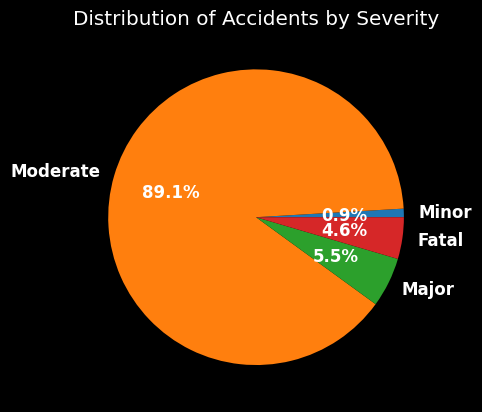

In [ ]:
severity_levels = ['Minor', 'Moderate', 'Major', 'Fatal']
severity_counts = data.groupby('Severity').size()

# Plot a pie chart
plt.pie(severity_counts, labels=severity_levels, autopct='%1.1f%%')
plt.title('Distribution of Accidents by Severity')
plt.show()

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">Insights:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">    
<li>1. In <span style="font-weight: bold;color:#122ecc;">89% Cases</span> of road accidents, the impact on the traffic was <span style="font-weight: bold;color:#122ecc;">Moderate (Severity-2)</span>.</li>
<br>
<li>2. In <span style="font-weight: bold;color:#122ecc;">4.6% Cases</span> of road accidents, the impact on the traffic was <span style="font-weight: bold;color:#122ecc;">highly Severe (Severity-4)</span>.</li>
</ul>
</div>

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=16WjYIfoUzn4uY2PeItGTOlfZODUwzmMZ" align="left" hspace="15px" vspace="20px" width="50" height="60" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Yu Mincho Demibold;font-size:25px;font-style: italic;color:  #6468e8">Crash O'Clock:Uncovering the Timing of Traffic Troubles</li>
</ul>

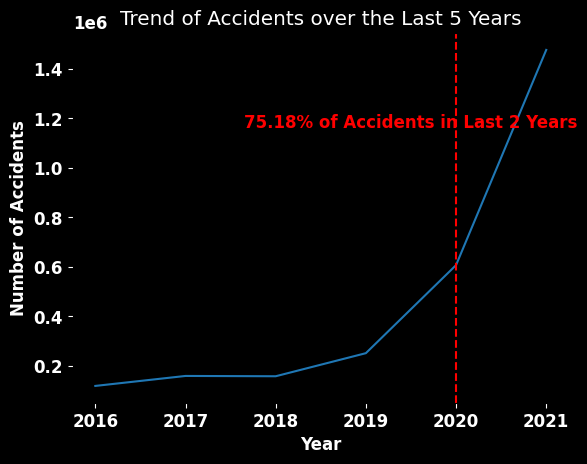

In [ ]:
year_counts = data['Year'].value_counts().sort_index()
total_accidents = year_counts.sum()
last_two_years_accidents = year_counts[-2:].sum()
last_two_years_percentage = last_two_years_accidents / total_accidents * 100
plt.plot(year_counts.index, year_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Trend of Accidents over the Last 5 Years')
plt.axvline(x=2020, color='red', linestyle='--')
plt.annotate(f'{last_two_years_percentage:.2f}% of Accidents in Last 2 Years',
             xy=(2019.5, year_counts.max() * 0.8),
             ha='center', va='center', color='red')
plt.show()

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">Insights:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">
<li>30. From the above figure, it is clear that in <span style="font-weight: bold; color:#122ecc">last 6 years (2016-2021)</span> in US <span style="font-weight: bold; color:#122ecc">accidents percentage</span> has <span style="font-weight: bold;color:#122ecc">increased significantly</span>.</li>
<br>
<li>31. <span style="font-weight: bold; color:#122ecc">75%</span> of the total road accident records of last 6 years happened only within <span style="font-weight: bold; color:#122ecc">last 2 years (2020, 2021)</span>.</li>
</ul>
</div>

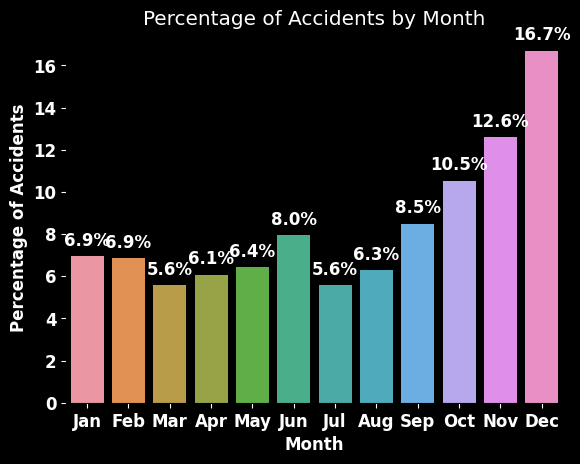

In [ ]:
month_counts = data['Month'].value_counts().sort_index()
month_percentages = month_counts / month_counts.sum() * 100
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
#plt.bar(month_labels, month_percentages)
sns.barplot(x=month_labels, y=month_percentages)
plt.xlabel('Month')
plt.ylabel('Percentage of Accidents')
plt.title('Percentage of Accidents by Month')
for index, value in enumerate(month_percentages):
    plt.text(index, value+0.5, str(round(value, 1))+'%', ha='center')
plt.show()

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">Insights:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">   
<li>1. Around <span style="font-weight: bold; color:#122ecc">16.7 %</span> of the road accidents occurred in the month of <span style="font-weight: bold; color:#122ecc">December</span>.</li>
<br>
<li>2. <span style="font-weight: bold; color:#122ecc">July and March</span> are the months with <span style="font-weight: bold; color:#122ecc">least (5.6%)</span> no. of road accidents in US.</li>
<br>
<li>3. <span style="font-weight: bold; color:#122ecc">40%</span> of the road accidents occurred only within the <span style="font-weight: bold; color:#122ecc">3 months, October to December</span> <span style="font-weight: bold; color:#122ecc">(i.e., transition period from Autumn to Winter)</span>.</li> 
</ul>
</div>

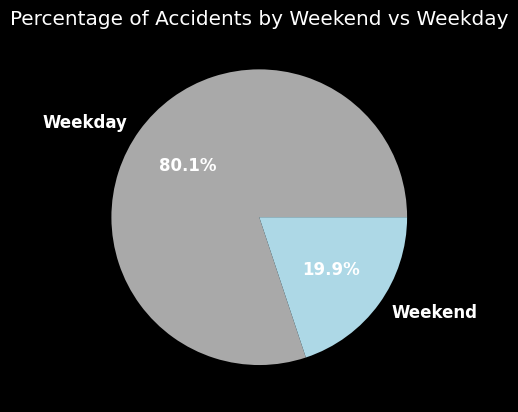

In [ ]:
weekend_count = data['Weekend'].value_counts()[1]
weekday_count = data['Weekend'].value_counts()[0]
weekend_percent = (weekend_count / len(data)) * 100
weekday_percent = (weekday_count / len(data)) * 100
sns.color_palette("pastel")
plt.pie([weekday_percent, weekend_percent], labels=['Weekday', 'Weekend'], autopct='%1.1f%%', colors=['#A9A9A9','#ADD8E6'])
plt.title('Percentage of Accidents by Weekend vs Weekday')
plt.show()

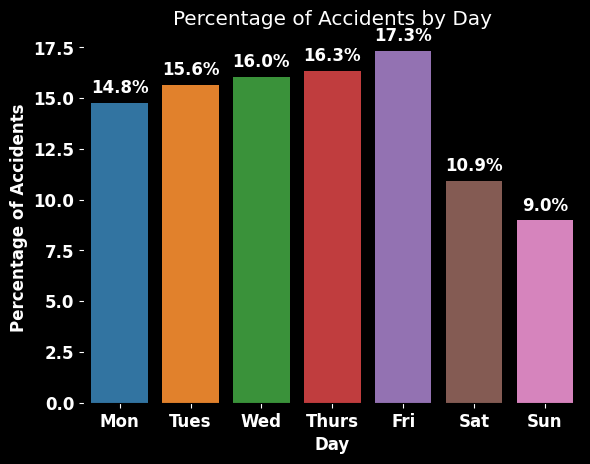

In [ ]:
day_counts = data['Day'].value_counts().sort_index()
day_percentages = day_counts / day_counts.sum() * 100
day_labels = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
sns.barplot(x=day_labels, y=day_percentages)
plt.xlabel('Day')
plt.ylabel('Percentage of Accidents')
plt.title('Percentage of Accidents by Day')
for index, value in enumerate(day_percentages):
    plt.text(index, value+0.5, str(round(value, 1))+'%', ha='center')
plt.show()

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">Insights:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">
<li>1. <span style="font-weight: bold; color:#122ecc">Working Days</span> of the week have almost <span style="font-weight: bold; color:#122ecc">2 times higher</span> accident percentage, compared with the <span style="font-weight: bold; color:#122ecc">Weekend Days</span> </li>
<br>
<li>2. Only around <span style="font-weight: bold; color:#122ecc">20%</span> road accident records occurred in <span style="font-weight: bold; color:#122ecc">weekend</span>.</li>
<br>
<li>3. <span style="font-weight: bold; color:#122ecc">Friday</span> of a week is having the <span style="font-weight: bold; color:#122ecc">highest</span> percentage of road accidents.</li>
<br>
<li>4. On <span style="font-weight: bold; color:#122ecc">Sunday</span> the percentage of road accidents in US is <span style="font-weight: bold; color:#122ecc">lowest</span>.</li>
</ul>
</div>

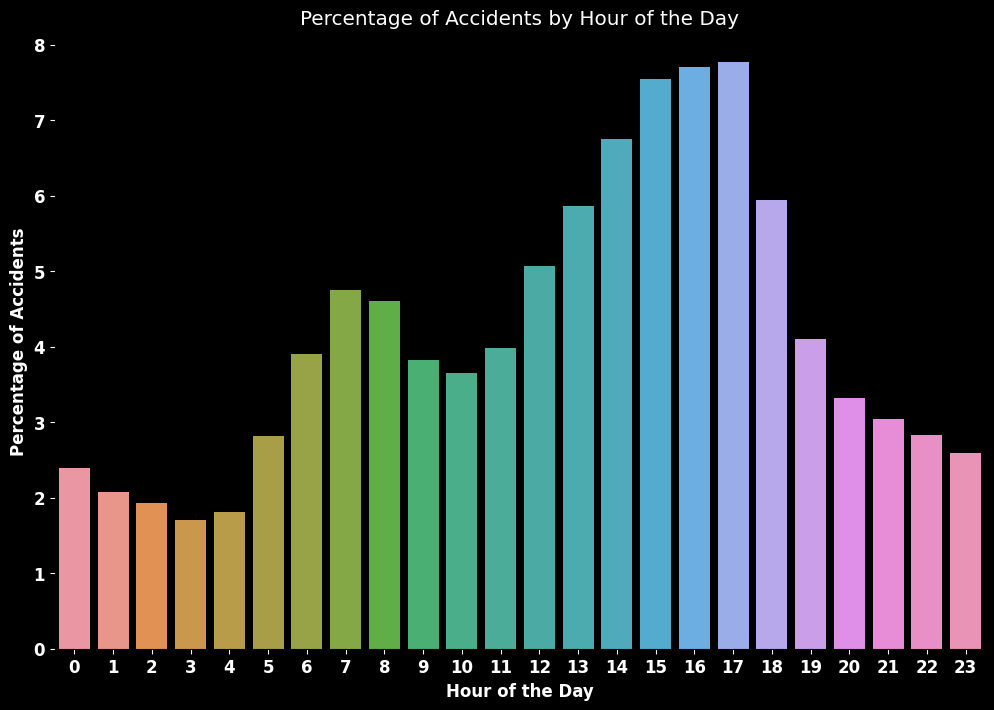

In [ ]:
hour_counts = data['Start_Hour'].value_counts().sort_index()
hour_percentages = hour_counts / hour_counts.sum() * 100
plt.figure(figsize=(12,8))
sns.barplot(x=hour_percentages.index, y=hour_percentages)
plt.xlabel('Hour of the Day')
plt.ylabel('Percentage of Accidents')
plt.title('Percentage of Accidents by Hour of the Day')
plt.xticks(hour_percentages.index)
plt.show()

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">Insights:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">  
<li>1. In evening, around <span style="font-weight: bold; color:#122ecc">30%</span> of the road accidents occurred in between <span style="font-weight: bold; color:#122ecc">3:00PM</span> to <span style="font-weight: bold; color:#122ecc">6:00PM</span>.</li>
<br>
<li>2. The <span style="font-weight: bold; color:#122ecc">most-deadliest accident hour</span> is <span style="font-weight: bold; color:#122ecc">5:00PM</span> implies the <span style="font-weight: bold; color:#122ecc">Evening Office-Returning Hours</span>.</li>
<br>  
</ul>
</div>

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=1PKxlMSZjyJcv1X8PIJ8CLUQb9nl_gxdH" align="left" hspace="5px" vspace="7px" width="70" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Yu Mincho Demibold;font-size:20px;font-style: italic;color:  #6468e8">Unveiling the  Road to Disaster: How Road Conditions Can Make or Break Your Commute</li>
</ul>

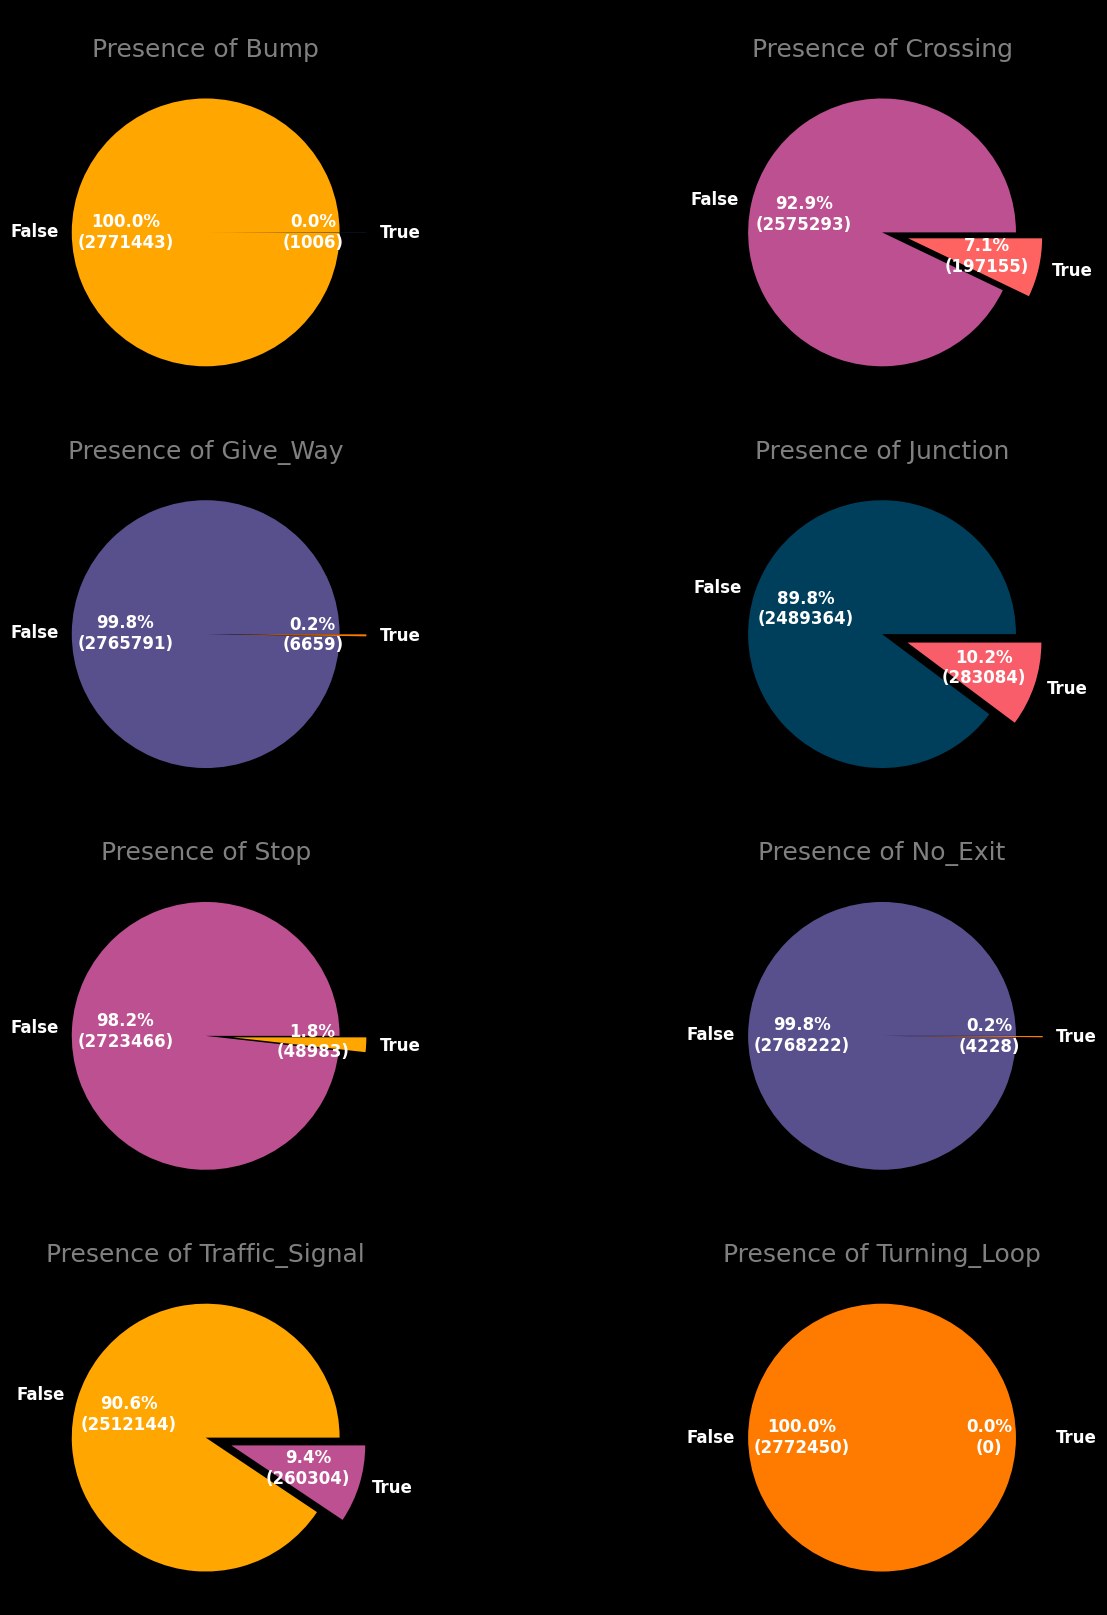

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2, figsize = (16,20))

road_conditions = ['Bump', 'Crossing', 'Give_Way', 'Junction', 'Stop', 'No_Exit', 'Traffic_Signal', 'Turning_Loop']
colors = [('#ffa600', '#003f5c'), ('#bc5090', '#ff6361'), ('#58508d', '#ff7b00'), ('#003f5c', '#f95d6a'),          ('#bc5090', '#ffa600'), ('#58508d', '#ff7b00'), ('#ffa600', '#bc5090'), ('#ff7b00', '#58508d')]
count = 0

def func(pct, allvals):
    absolute = int(round(pct/100*np.sum(allvals), 2))
    return "{:.1f}%\n({:d})".format(pct, absolute)

for i in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]:
    size = list(data[road_conditions[count]].value_counts())
    if len(size) != 2:
        size.append(0)
    labels = ['False', 'True']
    i.pie(size, labels = labels, colors = colors[count],
                    autopct = lambda pct: func(pct, size), labeldistance=1.1,
                    textprops={'fontsize': 12}, explode=[0, 0.2])
    title = '\nPresence of {}'.format(road_conditions[count])
    i.set_title(title, fontsize = 18, color='grey')
    count += 1
    
plt.show()


<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">Insights:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">
<li>1. Almost in every case  <span style="font-weight: bold; color:#122ecc">Bumper, Yield, Turning Loop were absent</span> in the accident spot.</li>
<br>
<li>2. In <span style="font-weight: bold; color:#122ecc">7%</span> cases, road accidents happened <span style="font-weight: bold; color:#122ecc">near the crossing</span> and<span style="font-weight: bold; color:#122ecc">10%</span> road accident cases recorded <span style="font-weight: bold; color:#122ecc">near the junctions</span> and <span style="font-weight: bold; color:#122ecc">9.4%</span> road accident cases were recorded <span style="font-weight: bold; color:#122ecc">near the traffic signal</span></li>
<br>
<li>3. In <span style="font-weight: bold; color:#122ecc">98%</span> cases, there were <span style="font-weight: bold; color:#122ecc">no Stop sign</span> near the accident area.</li>
<br>
</ul>
</div>

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=1lPC6VjDxg32gFO0xiglDRA1K_nrdeSTZ" align="left" hspace="15px" vspace="20px" width="50" height="60" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Yu Mincho Demibold;font-size:20px;font-style: italic;color:  #6468e8">Is Mother Nature the Ultimate Roadblock? : A look at how weather conditions impact road safety </li>
</ul>

(0.0, 600000.0)

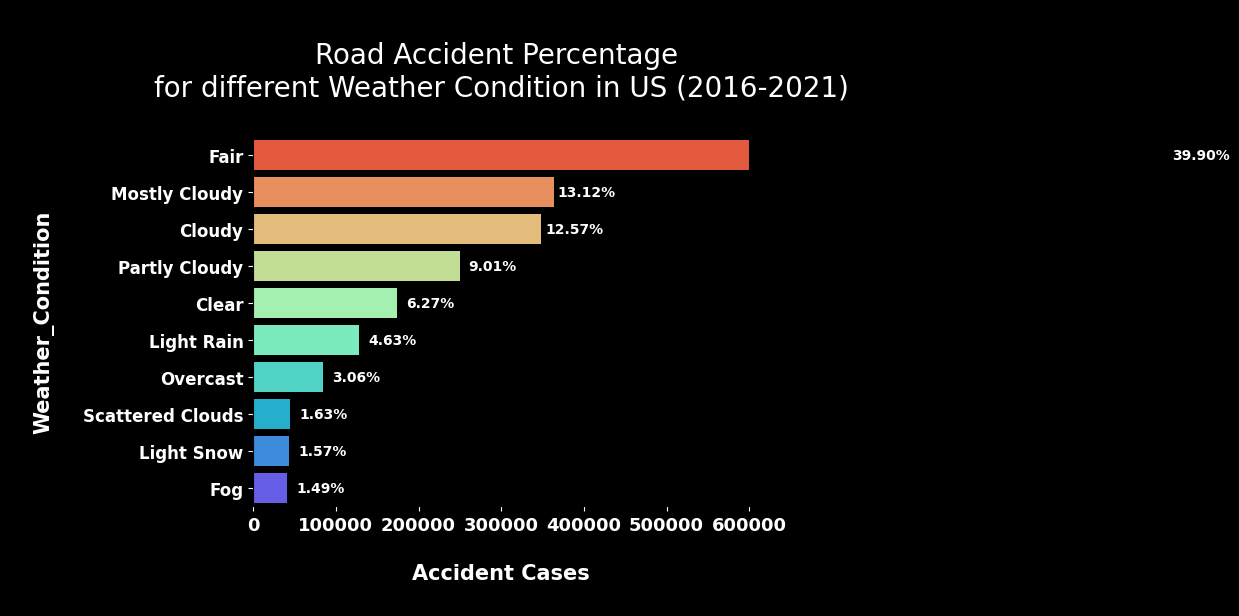

In [ ]:
weather_condition_df = pd.DataFrame(data.Weather_Condition.value_counts().head(10)).reset_index().rename(columns={'index':'Weather_Condition', 'Weather_Condition':'Cases'})
cmap = cm.get_cmap('rainbow_r', 10)   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]
ax=sns.barplot(x=weather_condition_df['Cases'], y=weather_condition_df['Weather_Condition'], palette='rainbow_r')
total = data.shape[0]
for p in ax.patches:
    plt.text(p.get_width()+40000, p.get_y()+0.4,
            '{:.2f}%'.format(p.get_width()*100/total),ha='center', va='center', fontsize=10, color='white', weight='bold')
plt.title('\nRoad Accident Percentage \nfor different Weather Condition in US (2016-2021)\n', size=20)
plt.xlabel('\nAccident Cases\n', fontsize=15)
plt.ylabel('\nWeather_Condition\n', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlim(0, 600000)

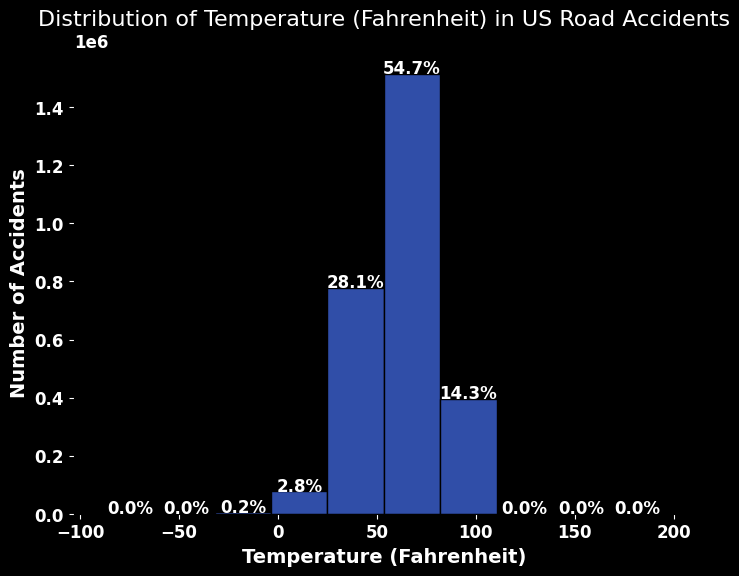

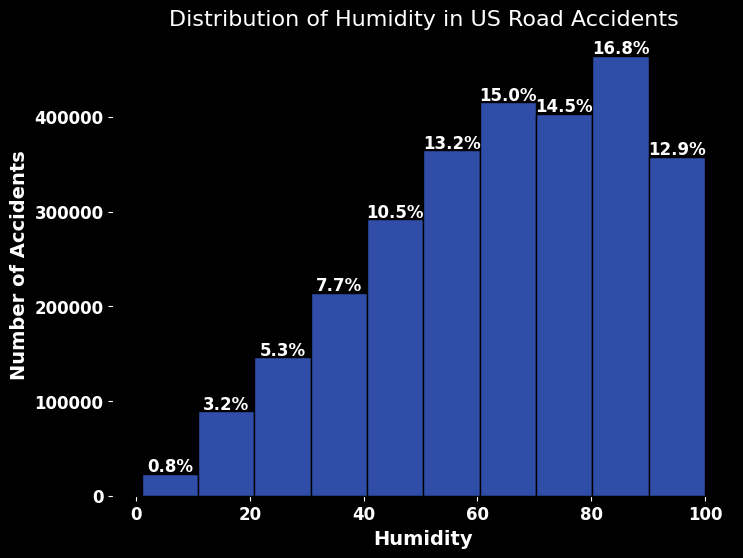

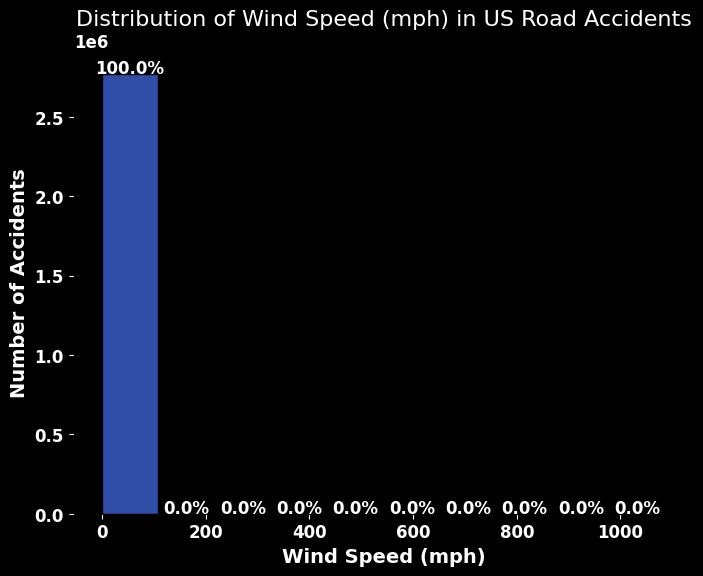

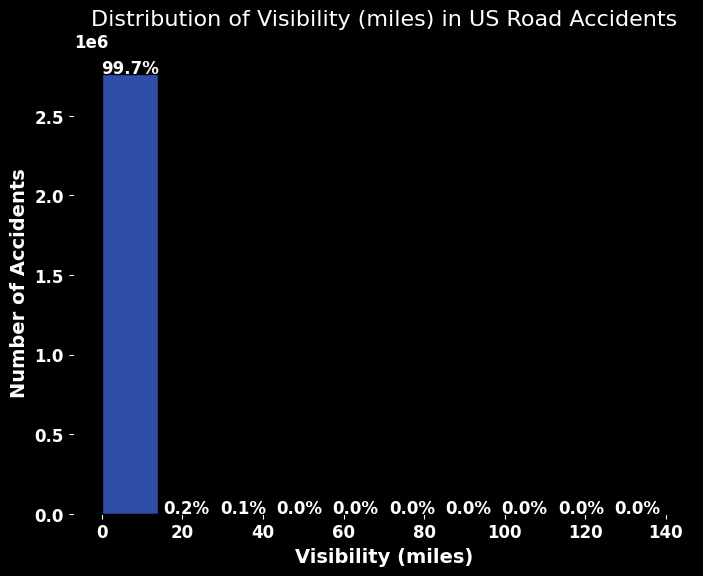

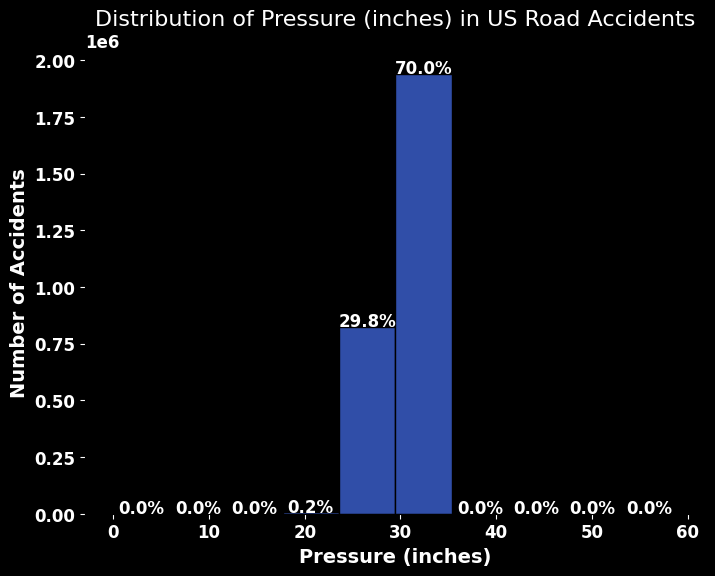

In [ ]:
def plot_histogram(data, col_name, bin_size, x_label):
    plt.figure(figsize=(8,6))
    sns.histplot(data[col_name], bins=bin_size, kde=False, color='royalblue')
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel('Number of Accidents', fontsize=14)
    plt.title('Distribution of {} in US Road Accidents'.format(x_label), fontsize=16)
    counts, bins = np.histogram(data[col_name], bins=bin_size)
    percentages = counts / len(data[col_name]) * 100
    for i in range(bin_size):
        plt.text(bins[i]+(bins[i+1]-bins[i])/2, counts[i]+2000, str(round(percentages[i],1))+'%', ha='center')
    
    plt.show()
plot_histogram(data, 'Temperature(F)', 10, 'Temperature (Fahrenheit)')
plot_histogram(data, 'Humidity(%)', 10, 'Humidity')
plot_histogram(data, 'Wind_Speed(mph)', 10, 'Wind Speed (mph)')
plot_histogram(data, 'Visibility(mi)', 10, 'Visibility (miles)')
plot_histogram(data, 'Pressure(in)', 10, 'Pressure (inches)')


<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">Insight:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">  
<li>1. In <span style="font-weight: bold; color:#122ecc">most</span> of the <span style="font-weight: bold; color:#122ecc">cases (39.9%)</span> the <span style="font-weight: bold; color:#122ecc">weather</span> was <span style="font-weight: bold; color:#122ecc">Fair</span> and approximately in <span style="font-weight: bold; color:#122ecc">41% cases</span> it was <span style="font-weight: bold; color:#122ecc">overcast with specific amount of clouds</span>.</li>
<br>
<li>2. In the <span style="font-weight: bold; color:#122ecc">temperature</span> range of <span style="font-weight: bold; color:#122ecc">61(F) - 91(F)</span>, majority <span style="font-weight: bold; color:#122ecc">55%</span> of the road accidents occurred.</li>
<br>
<li>3. In <span style="font-weight: bold; color:#122ecc">maximum cases (16.8%)</span> of road accident, the <span style="font-weight: bold; color:#122ecc">humidity</span> range is between <span style="font-weight: bold; color:#122ecc">81% - 91%</span>.</li>   
<br>
<li>4. In <span style="font-weight: bold; color:#122ecc">almost all</span> of road accident cases, the <span style="font-weight: bold; color:#122ecc">wind speed</span> is less than <span style="font-weight: bold; color:#122ecc">100 mph</span>.</li> 
<br>
<li>5. In <span style="font-weight: bold; color:#122ecc">maximum cases (99.97%)</span> of road accident, the <span style="font-weight: bold; color:#122ecc">Visibility range </span> is between <span style="font-weight: bold; color:#122ecc">0(mi) - 15(mi)</span>.</li>
<br>
<li>57. In <span style="font-weight: bold; color:#122ecc">70%</span> of road accident cases, the <span style="font-weight: bold; color:#122ecc">air pressure</span> range is between <span style="font-weight: bold; color:#122ecc">30(in) - 35(in)</span>.</li>  
</ul>
</div>

Final preprocessed data

In [ ]:
data

,ID,Severity,Start_Lat,Start_Lng,Distance(mi),Description,City,County,State,Temperature(F),...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Duration(min),Start_Hour,Day,Month,Year,Weekend
0,A-1,3,40.108910,-83.092860,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,Dublin,Franklin,OH,42.1,...,0,0,0,1,360.0,0,0,2,2016,0
1,A-2,2,39.865420,-84.062800,0.747,At OH-4/OH-235/Exit 41 - Accident.,Dayton,Montgomery,OH,36.9,...,0,0,0,1,360.0,5,0,2,2016,0
2,A-3,2,39.102660,-84.524680,0.055,At I-71/US-50/Exit 1 - Accident.,Cincinnati,Hamilton,OH,36.0,...,0,0,0,1,360.0,6,0,2,2016,0
3,A-4,2,41.062130,-81.537840,0.123,At Dart Ave/Exit 21 - Accident.,Akron,Summit,OH,39.0,...,0,0,0,1,360.0,6,0,2,2016,0
4,A-5,3,39.172393,-84.492792,0.500,At Mitchell Ave/Exit 6 - Accident.,Cincinnati,Hamilton,OH,37.0,...,0,0,0,0,360.0,7,0,2,2016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,34.002480,-117.379360,0.543,At Market St - Accident.,Riverside,Riverside,CA,86.0,...,0,0,0,0,28.0,18,4,8,2019,0
2845338,A-2845339,2,32.766960,-117.148060,0.338,At Camino Del Rio/Mission Center Rd - Accident.,San Diego,San Diego,CA,70.0,...,0,0,0,0,26.0,19,4,8,2019,0
2845339,A-2845340,2,33.775450,-117.847790,0.561,At Glassell St/Grand Ave - Accident. in the ri...,Orange,Orange,CA,73.0,...,0,0,0,0,28.0,19,4,8,2019,0
2845340,A-2845341,2,33.992460,-118.403020,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,Culver City,Los Angeles,CA,71.0,...,0,0,0,0,29.0,19,4,8,2019,0


# Part IV: Apriori algorithm to provide recommendations based on the association rules

In [ ]:
#Loads the complete data set and narrows down the attributes we want to consider
completeDataSet = pd.read_csv('/kaggle/input/us-accidents/US_Accidents_Dec21_updated.csv')
completeDataSet = completeDataSet
dataSetTemp=completeDataSet[['Start_Time','Severity','Description','City','State','Temperature(F)','Weather_Condition','Amenity','Crossing','Junction','Railway','Station','Stop','Traffic_Signal','Bump','Give_Way','No_Exit','Roundabout','Traffic_Calming','Turning_Loop','Sunrise_Sunset']]

In [ ]:
dataSet = dataSetTemp.copy()
dataSet.describe()

,Severity,Temperature(F)
count,2.845342e+06,2.776068e+06
mean,2.137572e+00,6.179356e+01
std,4.787216e-01,1.862263e+01
min,1.000000e+00,-8.900000e+01
25%,2.000000e+00,5.000000e+01
50%,2.000000e+00,6.400000e+01
75%,2.000000e+00,7.600000e+01
max,4.000000e+00,1.960000e+02


Temperature is converted to ranges 

In [ ]:
dataSet['Temperature'] = pd.cut(dataSet['Temperature(F)'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','>90'])
dataSet  = dataSet.drop('Temperature(F)',axis = 1)

The weather conditions column is cleaned

In [ ]:
#Makes sure that the severity levels are converted to strings
dataSet['Severity'] = [str(i) for i in dataSet['Severity']]
dataSet['Month']=[i.split("-")[1] for i in dataSet['Start_Time']]
del dataSet['Start_Time']

del dataSet['Description']

dataSet["Weather_Condition"].fillna("No Value", inplace = True) 
dataSet.loc[dataSet['Weather_Condition'].str.contains('Snow',case=False), 'Weather_Condition'] = 'Snow'
dataSet.loc[dataSet['Weather_Condition'].str.contains('Fair',case=False), 'Weather_Condition'] = 'Clear'
dataSet.loc[dataSet['Weather_Condition'].str.contains('Rain',case=False), 'Weather_Condition'] = 'Rain'
dataSet.loc[dataSet['Weather_Condition'].str.contains('Fog',case=False), 'Weather_Condition'] = 'Fog'
dataSet.loc[dataSet['Weather_Condition'].str.contains('Haze',case=False), 'Weather_Condition'] = 'Fog'
dataSet.loc[dataSet['Weather_Condition'].str.contains('Cloud',case=False), 'Weather_Condition'] = 'Cloudy'
dataSet.loc[dataSet['Weather_Condition'].str.contains('Overcast',case=False), 'Weather_Condition'] = 'Cloudy'
dataSet.loc[~dataSet['Weather_Condition'].str.contains('Overcast|Cloud|Haze|Fog|Rain|Clear|Snow',case=False), 'Weather_Condition'] = 'Other'

dataSet

,Severity,City,State,Weather_Condition,Amenity,Crossing,Junction,Railway,Station,Stop,Traffic_Signal,Bump,Give_Way,No_Exit,Roundabout,Traffic_Calming,Turning_Loop,Sunrise_Sunset,Temperature,Month
0,3,Dublin,OH,Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,40-50,02
1,2,Dayton,OH,Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,30-40,02
2,2,Cincinnati,OH,Cloudy,False,False,True,False,False,False,False,False,False,False,False,False,False,Night,30-40,02
3,2,Akron,OH,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,30-40,02
4,3,Cincinnati,OH,Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,30-40,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,2,Riverside,CA,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,80-90,08
2845338,2,San Diego,CA,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,60-70,08
2845339,2,Orange,CA,Cloudy,False,False,True,False,False,False,False,False,False,False,False,False,False,Day,70-80,08
2845340,2,Culver City,CA,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,70-80,08


Replacing the True/False with self explanatory values

In [ ]:
#Replaces true/false values in some attributes with a string labeling
dataSet.Bump = dataSet.Bump.replace({False:'Bump_False',True:'Bump_True'})
dataSet.Amenity = dataSet.Amenity.replace({False:'Amenity_False',True:'Amenity_True'})
dataSet.Crossing = dataSet.Crossing.replace({False:'Crossing_False',True:'Crossing_True'})
dataSet.Give_Way = dataSet.Give_Way.replace({False:'Give_Way_False',True:'Give_Way_True'})
dataSet.Junction = dataSet.Junction.replace({False:'Junction_False',True:'Junction_True'})
dataSet.No_Exit = dataSet.No_Exit.replace({False:'No_Exit_False',True:'No_Exit_True'})
dataSet.Railway = dataSet.Railway.replace({False:'Railway_False',True:'Railway_True'})
dataSet.Roundabout = dataSet.Roundabout.replace({False:'Roundabout_False',True:'Roundabout_True'})
dataSet.Station = dataSet.Station.replace({False:'Station_False',True:'Station_True'})
dataSet.Stop = dataSet.Stop.replace({False:'Stop_False',True:'Stop_True'})
dataSet.Traffic_Calming = dataSet.Traffic_Calming.replace({False:'Traffic_Calming_False',True:'Traffic_Calming_True'})
dataSet.Traffic_Signal = dataSet.Traffic_Signal.replace({False:'Traffic_Signal_False',True:'Traffic_Signal_True'})
dataSet.Turning_Loop = dataSet.Turning_Loop.replace({False:'Turning_Loop_False',True:'Turning_Loop_True'})


In [ ]:
#Ensures we have no nan values
dataSet = dataSet.dropna()
dataSet.isnull().sum()*100/dataSet.shape[0]

Severity             0.0
City                 0.0
State                0.0
Weather_Condition    0.0
Amenity              0.0
Crossing             0.0
Junction             0.0
Railway              0.0
Station              0.0
Stop                 0.0
Traffic_Signal       0.0
Bump                 0.0
Give_Way             0.0
No_Exit              0.0
Roundabout           0.0
Traffic_Calming      0.0
Turning_Loop         0.0
Sunrise_Sunset       0.0
Temperature          0.0
Month                0.0
dtype: float64

In [ ]:
dataSet

,Severity,City,State,Weather_Condition,Amenity,Crossing,Junction,Railway,Station,Stop,Traffic_Signal,Bump,Give_Way,No_Exit,Roundabout,Traffic_Calming,Turning_Loop,Sunrise_Sunset,Temperature,Month
0,3,Dublin,OH,Rain,Amenity_False,Crossing_False,Junction_False,Railway_False,Station_False,Stop_False,Traffic_Signal_False,Bump_False,Give_Way_False,No_Exit_False,Roundabout_False,Traffic_Calming_False,Turning_Loop_False,Night,40-50,02
1,2,Dayton,OH,Rain,Amenity_False,Crossing_False,Junction_False,Railway_False,Station_False,Stop_False,Traffic_Signal_False,Bump_False,Give_Way_False,No_Exit_False,Roundabout_False,Traffic_Calming_False,Turning_Loop_False,Night,30-40,02
2,2,Cincinnati,OH,Cloudy,Amenity_False,Crossing_False,Junction_True,Railway_False,Station_False,Stop_False,Traffic_Signal_False,Bump_False,Give_Way_False,No_Exit_False,Roundabout_False,Traffic_Calming_False,Turning_Loop_False,Night,30-40,02
3,2,Akron,OH,Cloudy,Amenity_False,Crossing_False,Junction_False,Railway_False,Station_False,Stop_False,Traffic_Signal_False,Bump_False,Give_Way_False,No_Exit_False,Roundabout_False,Traffic_Calming_False,Turning_Loop_False,Night,30-40,02
4,3,Cincinnati,OH,Rain,Amenity_False,Crossing_False,Junction_False,Railway_False,Station_False,Stop_False,Traffic_Signal_False,Bump_False,Give_Way_False,No_Exit_False,Roundabout_False,Traffic_Calming_False,Turning_Loop_False,Day,30-40,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,2,Riverside,CA,Clear,Amenity_False,Crossing_False,Junction_False,Railway_False,Station_False,Stop_False,Traffic_Signal_False,Bump_False,Give_Way_False,No_Exit_False,Roundabout_False,Traffic_Calming_False,Turning_Loop_False,Day,80-90,08
2845338,2,San Diego,CA,Clear,Amenity_False,Crossing_False,Junction_False,Railway_False,Station_False,Stop_False,Traffic_Signal_False,Bump_False,Give_Way_False,No_Exit_False,Roundabout_False,Traffic_Calming_False,Turning_Loop_False,Day,60-70,08
2845339,2,Orange,CA,Cloudy,Amenity_False,Crossing_False,Junction_True,Railway_False,Station_False,Stop_False,Traffic_Signal_False,Bump_False,Give_Way_False,No_Exit_False,Roundabout_False,Traffic_Calming_False,Turning_Loop_False,Day,70-80,08
2845340,2,Culver City,CA,Clear,Amenity_False,Crossing_False,Junction_False,Railway_False,Station_False,Stop_False,Traffic_Signal_False,Bump_False,Give_Way_False,No_Exit_False,Roundabout_False,Traffic_Calming_False,Turning_Loop_False,Day,70-80,08


In [ ]:
dataSet.describe()

,Severity,City,State,Weather_Condition,Amenity,Crossing,Junction,Railway,Station,Stop,Traffic_Signal,Bump,Give_Way,No_Exit,Roundabout,Traffic_Calming,Turning_Loop,Sunrise_Sunset,Temperature,Month
count,2756687,2756687,2756687,2756687,2756687,2756687,2756687,2756687,2756687,2756687,2756687,2756687,2756687,2756687,2756687,2756687,2756687,2756687,2756687,2756687
unique,4,10982,49,6,2,2,2,2,2,2,2,2,2,2,2,2,1,2,9,12
top,2,Miami,CA,Clear,Amenity_False,Crossing_False,Junction_False,Railway_False,Station_False,Stop_False,Traffic_Signal_False,Bump_False,Give_Way_False,No_Exit_False,Roundabout_False,Traffic_Calming_False,Turning_Loop_False,Day,70-80,12
freq,2454120,105890,768632,1276946,2729441,2560861,2475292,2734908,2690019,2708023,2497668,2755700,2750069,2752486,2756568,2755027,2756687,1760383,553582,459850


In [ ]:
wholeDataSet = dataSet.copy()

Whole dataset is now made to a list format and cleaning the unneccesary entries

In [ ]:
#Converts the whole dataset from dataframes to list representations and preprocesses them for the apriori algorithm

wholeDataSetApriori = [None] * len(wholeDataSet)
for i in range(0, len(wholeDataSetApriori)):
    wholeDataSetApriori[i] = [columnData[wholeDataSet.index[i]] for (columnName, columnData) in wholeDataSet.iteritems()]
    wholeDataSetApriori[i][0] = "Severity_"+wholeDataSetApriori[i][0]
    if 'Amenity_False' in wholeDataSetApriori[i]:
        wholeDataSetApriori[i].remove('Amenity_False')
    if 'Crossing_False' in wholeDataSetApriori[i]:
        wholeDataSetApriori[i].remove('Crossing_False')
    if 'Junction_False' in wholeDataSetApriori[i]:
        wholeDataSetApriori[i].remove('Junction_False')
    if 'Railway_False' in wholeDataSetApriori[i]:
        wholeDataSetApriori[i].remove('Railway_False')
    if 'Station_False' in wholeDataSetApriori[i]:
        wholeDataSetApriori[i].remove('Station_False')
    if 'Stop_False' in wholeDataSetApriori[i]:
        wholeDataSetApriori[i].remove('Stop_False')
    if 'Traffic_Signal_False' in wholeDataSetApriori[i]:
        wholeDataSetApriori[i].remove('Traffic_Signal_False')
    if 'Bump_False' in wholeDataSetApriori[i]:
        wholeDataSetApriori[i].remove('Bump_False')
    if 'Give_Way_False' in wholeDataSetApriori[i]:
        wholeDataSetApriori[i].remove('Give_Way_False')
    if 'No_Exit_False' in wholeDataSetApriori[i]:
        wholeDataSetApriori[i].remove('No_Exit_False')
    if 'Roundabout_False' in wholeDataSetApriori[i]:
        wholeDataSetApriori[i].remove('Roundabout_False')
    if 'Traffic_Calming_False' in wholeDataSetApriori[i]:
        wholeDataSetApriori[i].remove('Traffic_Calming_False')
    if 'Turning_Loop_False' in wholeDataSetApriori[i]:
        wholeDataSetApriori[i].remove('Turning_Loop_False')

Transaction encoding data to create frequent itemset

In [ ]:
#Converts back to a dataframe representation
#converts whole dataset
te = TransactionEncoder()
te_ary = te.fit(wholeDataSetApriori).transform(wholeDataSetApriori)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [ ]:
#produces frequent itemsets for the whole dataset
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)

Producing the association rules and sorting based on confidence

In [ ]:
#produces the association rules
association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values('confidence')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
112,(No delay or block),"(Day, Severity_2, Clear)",0.898313,0.338422,0.304684,0.339173,1.002219,0.000675,1.001136,0.021772
88,(No delay or block),"(Day, Severity_2, 05)",0.898313,0.338045,0.309207,0.344209,1.018233,0.005537,1.009399,0.176094
110,(Day),"(Severity_2, No delay or block, Clear)",0.852983,0.349543,0.304684,0.357198,1.021901,0.006530,1.011909,0.145773
111,(Severity_2),"(Day, No delay or block, Clear)",0.846197,0.346433,0.304684,0.360062,1.039342,0.011533,1.021298,0.246114
86,(Day),"(Severity_2, No delay or block, 05)",0.852983,0.346810,0.309207,0.362501,1.045245,0.013385,1.024614,0.294432
...,...,...,...,...,...,...,...,...,...,...
13,(Clear),(No delay or block),0.459335,0.898313,0.419847,0.914034,1.017500,0.007221,1.182869,0.031811
77,"(Day, Severity_2, 05)",(No delay or block),0.338045,0.898313,0.309207,0.914692,1.018233,0.005537,1.191997,0.027051
21,"(Day, 05)",(No delay or block),0.376025,0.898313,0.345773,0.919549,1.023640,0.007985,1.263959,0.037011
33,"(Severity_2, 05)",(No delay or block),0.376402,0.898313,0.346810,0.921382,1.025680,0.008683,1.293432,0.040150


Conclusion: On sorting the rules based on confidence it can be seen that Severity 2 has very little impact on blockages and delays. Similarly, it was observed that the day and month had a greater confidence with Severity 4 which helps in finding the fatality of any accident based on the day and month.
It can be seen that for Month 5 (May) the accidents are mostly of severity 2 with highest confidence. And the accidents in Day time of May are less likely to cause delays or blocks.
This way a number of insights can be taken from the association rules which help in enforcing traffic policies and rules.


# Part V: Decision tree after balancing the classes with SMOTE

In [ ]:
data.columns

Index(['ID', 'Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'City',
       'County', 'State', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Duration(min)', 'Start_Hour', 'Day', 'Month', 'Year', 'Weekend'],
      dtype='object')

Dropping the unimportant columns

In [ ]:
data = data.drop(['ID','Distance(mi)','Duration(min)'], axis=1)

In [ ]:
data = data.drop(['Turning_Loop'], axis=1)

Replacing the severity in array orders for ease

In [ ]:
data['Severity'] = data['Severity'].replace([1,2,3,4],[0,1,2,3])
data

,ID,Severity,Start_Lat,Start_Lng,Distance(mi),Description,City,County,State,Temperature(F),...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Duration(min),Start_Hour,Day,Month,Year,Weekend
0,A-1,2,40.108910,-83.092860,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,Dublin,Franklin,OH,42.1,...,0,0,0,1,360.0,0,0,2,2016,0
1,A-2,1,39.865420,-84.062800,0.747,At OH-4/OH-235/Exit 41 - Accident.,Dayton,Montgomery,OH,36.9,...,0,0,0,1,360.0,5,0,2,2016,0
2,A-3,1,39.102660,-84.524680,0.055,At I-71/US-50/Exit 1 - Accident.,Cincinnati,Hamilton,OH,36.0,...,0,0,0,1,360.0,6,0,2,2016,0
3,A-4,1,41.062130,-81.537840,0.123,At Dart Ave/Exit 21 - Accident.,Akron,Summit,OH,39.0,...,0,0,0,1,360.0,6,0,2,2016,0
4,A-5,2,39.172393,-84.492792,0.500,At Mitchell Ave/Exit 6 - Accident.,Cincinnati,Hamilton,OH,37.0,...,0,0,0,0,360.0,7,0,2,2016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,1,34.002480,-117.379360,0.543,At Market St - Accident.,Riverside,Riverside,CA,86.0,...,0,0,0,0,28.0,18,4,8,2019,0
2845338,A-2845339,1,32.766960,-117.148060,0.338,At Camino Del Rio/Mission Center Rd - Accident.,San Diego,San Diego,CA,70.0,...,0,0,0,0,26.0,19,4,8,2019,0
2845339,A-2845340,1,33.775450,-117.847790,0.561,At Glassell St/Grand Ave - Accident. in the ri...,Orange,Orange,CA,73.0,...,0,0,0,0,28.0,19,4,8,2019,0
2845340,A-2845341,1,33.992460,-118.403020,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,Culver City,Los Angeles,CA,71.0,...,0,0,0,0,29.0,19,4,8,2019,0


Observing the class imbalance in data

In [ ]:
data['Severity'].value_counts()

1    2469255
2     151145
3     126348
0      25702
Name: Severity, dtype: int64

Undersampling the class 1

In [ ]:
data_rest = data[data.Severity != 1]
data_1 = data[data.Severity == 1]
data_sev_1 = data_1.sample(150000)

,Severity,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,...,Month,Year,Weekend,Clear,Cloud,Rain,Heavy_Rain,Snow,Heavy_Snow,Fog
0,2,40.108910,-83.092860,42.1,58.0,29.76,10.0,10.400000,0.00,0,...,2,2016,0,0,0,1,0,0,0,0
4,2,39.172393,-84.492792,37.0,93.0,29.69,10.0,10.400000,0.01,0,...,2,2016,0,0,0,1,0,0,0,0
14,2,40.151785,-81.312635,33.1,92.0,29.62,10.0,7.395044,0.00,0,...,2,2016,0,0,1,0,0,0,0,0
15,2,40.151747,-81.312682,33.1,92.0,29.62,10.0,7.395044,0.00,0,...,2,2016,0,0,1,0,0,0,0,0
16,2,39.972410,-82.846950,34.0,100.0,29.65,6.0,7.395044,0.07,0,...,2,2016,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845305,2,34.075790,-118.276680,67.0,79.0,29.62,7.0,0.000000,0.00,0,...,8,2019,0,0,1,0,0,0,0,0
2845307,2,34.485189,-120.229276,70.0,76.0,29.87,9.0,3.000000,0.00,0,...,8,2019,0,0,1,0,0,0,0,0
2845314,3,33.685990,-117.886260,76.0,56.0,29.81,10.0,12.000000,0.00,0,...,8,2019,0,0,0,0,0,0,0,0
2845315,3,33.687300,-117.890190,76.0,56.0,29.81,10.0,12.000000,0.00,0,...,8,2019,0,0,0,0,0,0,0,0


In [ ]:
balanced = pd.concat([data_sev_1,data_rest])
balanced

,Severity,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,...,Month,Year,Weekend,Clear,Cloud,Rain,Heavy_Rain,Snow,Heavy_Snow,Fog
1325579,1,40.925048,-75.048111,69.0,84.0,29.78,10.0,0.000000,0.0,0,...,8,2021,1,0,0,1,0,0,0,0
1979331,1,33.852232,-118.279124,64.0,59.0,29.96,10.0,14.000000,0.0,0,...,11,2020,0,0,0,0,0,0,0,0
1096525,1,38.515436,-121.455369,79.0,42.0,29.84,10.0,7.395044,0.0,0,...,5,2021,1,0,0,0,0,0,0,0
1674798,1,39.200103,-76.761738,45.0,93.0,29.45,5.0,3.000000,0.0,0,...,1,2021,1,0,1,0,0,0,0,0
567109,1,33.826065,-117.832128,56.0,80.0,29.99,7.0,0.000000,0.0,0,...,12,2021,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845305,2,34.075790,-118.276680,67.0,79.0,29.62,7.0,0.000000,0.0,0,...,8,2019,0,0,1,0,0,0,0,0
2845307,2,34.485189,-120.229276,70.0,76.0,29.87,9.0,3.000000,0.0,0,...,8,2019,0,0,1,0,0,0,0,0
2845314,3,33.685990,-117.886260,76.0,56.0,29.81,10.0,12.000000,0.0,0,...,8,2019,0,0,0,0,0,0,0,0
2845315,3,33.687300,-117.890190,76.0,56.0,29.81,10.0,12.000000,0.0,0,...,8,2019,0,0,0,0,0,0,0,0


In [ ]:
balanced['Severity'].value_counts()

2    151145
1    150000
3    126348
0     25702
Name: Severity, dtype: int64

In [ ]:
# split X, y
X = balanced.drop('Severity', axis=1)
y= balanced['Severity']

Applying SMOTE to upsample the minority class to match the ratios of balance stratergy

In [ ]:
strategy = {0:150000, 1:150000, 2:151145, 3:150000}
oversample = SMOTE(sampling_strategy=strategy)
X, y = oversample.fit_resample(X, y)

Slitting data in 70:30 train:test splits

In [ ]:
# split train, test
X_train, X_test, y_train, y_test = train_test_split(\
  X, y, test_size=0.30, random_state=42)

Trainig and testing with Decisison Tree classifier

In [ ]:
# Decision tree algorithm

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)


# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred= dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)


# Print accuracy_entropy
print('[Decision Tree -- entropy] accuracy_score: {:.3f}.'.format(accuracy_entropy))



# Instantiate dt_gini, set 'gini' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)


# Fit dt_entropy to the training set
dt_gini.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred= dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_gini = accuracy_score(y_test, y_pred)

# Append to the accuracy list
acc=accuracy_gini

# Print accuracy_gini
print('[Decision Tree -- gini] accuracy_score: {:.3f}.'.format(accuracy_gini))

[Decision Tree -- entropy] accuracy_score: 0.716.
[Decision Tree -- gini] accuracy_score: 0.718.


In [ ]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88     44864
           1       0.79      0.77      0.78     44799
           2       0.62      0.62      0.62     45575
           3       0.62      0.55      0.58     45106

    accuracy                           0.72    180344
   macro avg       0.71      0.72      0.71    180344
weighted avg       0.71      0.72      0.71    180344



Conclusion: Decision tree classifier despite balanced classes done with SMOTE gave a low accuracy of 71% showing that the model couldn't learn how to classify based on the patterns in the data like bumps, crossing, signals, etc. which are the main features in road traffic data. It was also observed that the F1 score for classes showed lower scores for the different classes.


# Part VI: BERT for multi class classification of accident data 

Installing the libraries specific to BERT modeling

In [ ]:
 # installing required libraries
!pip install transformers
!pip install sentencepiece
!pip install contractions
!pip install Keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 41.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 28.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 22.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.0 MB/s eta 0:00:00


In [ ]:
# importing required libraries
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import torch
from torch.nn import BCEWithLogitsLoss, BCELoss
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras_preprocessing.sequence import pad_sequences
from transformers import RobertaTokenizer, RobertaForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix, f1_score, accuracy_score
import pickle
from tqdm import tqdm, trange
from ast import literal_eval
import json
import nltk
from nltk.tokenize import LineTokenizer, sent_tokenize
nltk.download('punkt')
import re
import contractions

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Preaparing data for training the BERT model

In [ ]:
data_0 = data[data.Severity == 0]
data_sev_0 = data_0.sample(1000)
data_1 = data[data.Severity == 1]
data_sev_1 = data_1.sample(1000)
data_2 = data[data.Severity == 2]
data_sev_2 = data_2.sample(1000)
data_3 = data[data.Severity == 3]
data_sev_3 = data_3.sample(1000)

In [ ]:
train_data = pd.concat([data_sev_0,data_sev_1,data_sev_2,data_sev_3])

In [ ]:
train_data.dropna(inplace=True)

In [ ]:
df = train_data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2986 entries, 0 to 3998
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2986 non-null   int64  
 1   ID                 2986 non-null   object 
 2   Severity           2986 non-null   int64  
 3   Start_Lat          2986 non-null   float64
 4   Start_Lng          2986 non-null   float64
 5   Distance(mi)       2986 non-null   float64
 6   Description        2986 non-null   object 
 7   City               2986 non-null   object 
 8   County             2986 non-null   object 
 9   State              2986 non-null   object 
 10  Temperature(F)     2986 non-null   float64
 11  Wind_Chill(F)      2986 non-null   float64
 12  Humidity(%)        2986 non-null   float64
 13  Pressure(in)       2986 non-null   float64
 14  Visibility(mi)     2986 non-null   float64
 15  Wind_Direction     2986 non-null   object 
 16  Wind_Speed(mph)    2986 

Selecting the most relevant features that describe the accident

In [ ]:
df_selected = df[['Severity','Description','City','County','State','Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)','Weather_Condition','Bump','Crossing','Junction','Roundabout','Stop','Traffic_Signal','Month','Weekend']]

In [ ]:
df_selected

,Severity,Description,City,County,State,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),...,Precipitation(in),Weather_Condition,Bump,Crossing,Junction,Roundabout,Stop,Traffic_Signal,Month,Weekend
0,0,At Johnston Road - Accident. Left lane closed.,Charlotte,Mecklenburg,NC,34.0,25.0,67.0,29.75,10.0,...,0.0,Partly Cloudy,0,0,0,0,0,0,2,0
1,0,At Gibson Blvd SE - Accident.,Albuquerque,Bernalillo,NM,84.0,84.0,21.0,24.64,10.0,...,0.0,Mostly Cloudy / Windy,0,1,0,0,0,1,6,0
2,0,At IL-68/Dundee Rd - Vehicle spun around.,Arlington Heights,Cook,IL,40.0,33.0,49.0,29.18,10.0,...,0.0,Fair,0,0,0,0,0,0,4,0
3,0,At Consulate Dr - Serious accident.,Orlando,Orange,FL,67.0,67.0,81.0,29.93,10.0,...,0.0,Mostly Cloudy,0,1,0,0,0,1,4,0
4,0,At Winterpock Rd/Lake Harbour Dr - Earlier acc...,Chesterfield,Chesterfield,VA,57.0,57.0,87.0,30.00,10.0,...,0.0,Cloudy,0,0,0,0,0,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,3,Closed at Barrett Pky/Exit 269 - Road closed d...,Kennesaw,Cobb,GA,75.0,75.0,82.0,28.91,10.0,...,0.0,Fair,0,0,1,0,0,0,7,0
3995,3,At CR-21/CR-628/Hillside Ave - Accident.,Hillside,Union,NJ,45.0,37.0,49.0,29.73,10.0,...,0.0,Fair / Windy,0,0,0,0,0,0,4,0
3996,3,Construction on US-191 SB near BABERS RANCH RD...,Morenci,Greenlee,AZ,56.0,56.0,26.0,26.80,10.0,...,0.0,Fair,0,0,0,0,0,0,10,0
3997,3,Closed at Ricks Dr - Road closed due to accident.,Mccordsville,Hancock,IN,41.0,36.4,76.0,29.86,10.0,...,0.0,Overcast,0,0,0,0,0,0,2,0


Cleaning the data to make it more descriptive

In [ ]:
df_selected['Bump'] = df_selected['Bump'].replace([1,0],["Bump","No Bump"])
df_selected['Crossing'] = df_selected['Crossing'].replace([1,0],["Crossing","No Crossing"])
df_selected['Junction'] = df_selected['Junction'].replace([1,0],["Junction","No Junction"])
df_selected['Roundabout'] = df_selected['Roundabout'].replace([1,0],["Roundabout","No Roundabout"])
df_selected['Stop'] = df_selected['Stop'].replace([1,0],["Stop","No Stop"])
df_selected['Traffic_Signal'] = df_selected['Traffic_Signal'].replace([1,0],["Traffic_Signal","No Traffic_Signal"])
df_selected['Weekend'] = df_selected['Weekend'].replace([1,0],["Weekend","Week day"])
df_selected['Month'] = df_selected['Month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],["Jan","Feb","Mar","Apr","May","June","July","Aug","Sep","Oct","Nov","Dec"])
df_selected

<ipython-input-11-18532d146777>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Bump'] = df_selected['Bump'].replace([1,0],["Bump","No Bump"])
<ipython-input-11-18532d146777>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Crossing'] = df_selected['Crossing'].replace([1,0],["Crossing","No Crossing"])
<ipython-input-11-18532d146777>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Severity,Description,City,County,State,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),...,Precipitation(in),Weather_Condition,Bump,Crossing,Junction,Roundabout,Stop,Traffic_Signal,Month,Weekend
0,0,At Johnston Road - Accident. Left lane closed.,Charlotte,Mecklenburg,NC,34.0,25.0,67.0,29.75,10.0,...,0.0,Partly Cloudy,No Bump,No Crossing,No Junction,No Roundabout,No Stop,No Traffic_Signal,2,Week day
1,0,At Gibson Blvd SE - Accident.,Albuquerque,Bernalillo,NM,84.0,84.0,21.0,24.64,10.0,...,0.0,Mostly Cloudy / Windy,No Bump,Crossing,No Junction,No Roundabout,No Stop,Traffic_Signal,6,Week day
2,0,At IL-68/Dundee Rd - Vehicle spun around.,Arlington Heights,Cook,IL,40.0,33.0,49.0,29.18,10.0,...,0.0,Fair,No Bump,No Crossing,No Junction,No Roundabout,No Stop,No Traffic_Signal,4,Week day
3,0,At Consulate Dr - Serious accident.,Orlando,Orange,FL,67.0,67.0,81.0,29.93,10.0,...,0.0,Mostly Cloudy,No Bump,Crossing,No Junction,No Roundabout,No Stop,Traffic_Signal,4,Week day
4,0,At Winterpock Rd/Lake Harbour Dr - Earlier acc...,Chesterfield,Chesterfield,VA,57.0,57.0,87.0,30.00,10.0,...,0.0,Cloudy,No Bump,No Crossing,No Junction,No Roundabout,No Stop,Traffic_Signal,5,Week day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,3,Closed at Barrett Pky/Exit 269 - Road closed d...,Kennesaw,Cobb,GA,75.0,75.0,82.0,28.91,10.0,...,0.0,Fair,No Bump,No Crossing,Junction,No Roundabout,No Stop,No Traffic_Signal,7,Week day
3995,3,At CR-21/CR-628/Hillside Ave - Accident.,Hillside,Union,NJ,45.0,37.0,49.0,29.73,10.0,...,0.0,Fair / Windy,No Bump,No Crossing,No Junction,No Roundabout,No Stop,No Traffic_Signal,4,Week day
3996,3,Construction on US-191 SB near BABERS RANCH RD...,Morenci,Greenlee,AZ,56.0,56.0,26.0,26.80,10.0,...,0.0,Fair,No Bump,No Crossing,No Junction,No Roundabout,No Stop,No Traffic_Signal,10,Week day
3997,3,Closed at Ricks Dr - Road closed due to accident.,Mccordsville,Hancock,IN,41.0,36.4,76.0,29.86,10.0,...,0.0,Overcast,No Bump,No Crossing,No Junction,No Roundabout,No Stop,No Traffic_Signal,2,Week day


In [ ]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2986 entries, 0 to 3998
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Severity           2986 non-null   int64  
 1   Description        2986 non-null   object 
 2   City               2986 non-null   object 
 3   County             2986 non-null   object 
 4   State              2986 non-null   object 
 5   Temperature(F)     2986 non-null   float64
 6   Wind_Chill(F)      2986 non-null   float64
 7   Humidity(%)        2986 non-null   float64
 8   Pressure(in)       2986 non-null   float64
 9   Visibility(mi)     2986 non-null   float64
 10  Wind_Speed(mph)    2986 non-null   float64
 11  Precipitation(in)  2986 non-null   float64
 12  Weather_Condition  2986 non-null   object 
 13  Bump               2986 non-null   object 
 14  Crossing           2986 non-null   object 
 15  Junction           2986 non-null   object 
 16  Roundabout         2986 

Processing the data to form contextual text of accident records

In [ ]:
severity, text = [],[]
for i,j in df_selected.iterrows():
    severity.append(j[0])
    string = j[1] + " in " + j[2]+","+j[3]+","+j[4]+" when temperature is "+str(j[5])+" when wind chill is "+str(j[6])+" when humidity is "+str(j[7])+" when pressure is "+str(j[8])+" when visibility is "+str(j[9])+" when wind speed is "+str(j[10])+" when precipitation is "+str(j[11])+" with weather condition "+j[12]+" and "+j[13]+" and "+j[14]+" and "+j[15]+" and "+j[16]+" and "+j[17]+" and "+j[18]+" in "+str(j[19])+" a "+j[20]
    text.append(string)

In [ ]:
text

['At Kemp Mill Rd - Accident. in Silver Spring,Montgomery,MD when temperature is 84.0 when wind chill is 84.0 when humidity is 43.0 when pressure is 29.83 when visibility is 10.0 when wind speed is 9.0 when precipitation is 0.0 with weather condition Fair and No Bump and No Crossing and No Junction and No Roundabout and No Stop and Traffic_Signal in June a Week day',
 'At 211th St/Exit 12 - Earlier accident. in Miami,Miami-Dade,FL when temperature is 72.0 when wind chill is 72.0 when humidity is 88.0 when pressure is 30.0 when visibility is 10.0 when wind speed is 6.0 when precipitation is 0.0 with weather condition Mostly Cloudy and No Bump and No Crossing and No Junction and No Roundabout and No Stop and No Traffic_Signal in May a Weekend',
 'Slow traffic from Park Row Dr to Price Plz due to accident. in Houston,Harris,TX when temperature is 81.0 when wind chill is 81.0 when humidity is 61.0 when pressure is 29.85 when visibility is 7.0 when wind speed is 18.0 when precipitation is 0

In [ ]:
d = {'text':text,'Severity':severity}

In [ ]:
df = pd.DataFrame(d)
df

,text,Severity
0,At Johnston Road - Accident. Left lane closed....,0
1,"At Gibson Blvd SE - Accident. in Albuquerque,B...",0
2,At IL-68/Dundee Rd - Vehicle spun around. in A...,0
3,At Consulate Dr - Serious accident. in Orlando...,0
4,At Winterpock Rd/Lake Harbour Dr - Earlier acc...,0
...,...,...
2981,Closed at Barrett Pky/Exit 269 - Road closed d...,3
2982,At CR-21/CR-628/Hillside Ave - Accident. in Hi...,3
2983,Construction on US-191 SB near BABERS RANCH RD...,3
2984,Closed at Ricks Dr - Road closed due to accide...,3


Severities observed in data

In [ ]:
df['Severity'].unique()

array([0, 1, 2, 3])

In [ ]:
text = list(df['text'])
severity = list(df['Severity'])

Tokenizing the training data with RobertaTokenizer

In [ ]:
# tokenizing using RobertaTokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
encodings = tokenizer.batch_encode_plus(text, max_length = 512, pad_to_max_length = True) 

print('tokenizer outputs: ', encodings.keys())

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


tokenizer outputs:  dict_keys(['input_ids', 'attention_mask'])


In [ ]:
# getting tokenized and encoded sentences and attention masks
input_ids = encodings['input_ids'] 
attention_masks = encodings['attention_mask'] 

Splitting the data in 90:10 ratio for train:validation

In [ ]:
train_inputs, validation_inputs, train_labels, validation_labels, train_masks, validation_masks = train_test_split(input_ids, severity, attention_masks, random_state = 303, test_size = 100)

print("x_train", len(train_inputs))
print("x_val", len(validation_inputs))
print("y_train", len(train_labels))
print("y_val", len(validation_labels))

x_train 2886
x_val 100
y_train 2886
y_val 100


Creating tensors of data

In [ ]:
# Converting all of our data into torch tensors, the required datatype for our model
train_inputs = torch.tensor(input_ids)
train_labels = torch.tensor(severity)
train_masks = torch.tensor(attention_masks)

validation_inputs = torch.tensor(validation_inputs)
validation_labels = torch.tensor(validation_labels)
validation_masks = torch.tensor(validation_masks)

Iterating over the data tensors

In [ ]:
# Creating an iterator of our data with torch DataLoader. This helps save on memory during training because, unlike a for loop, an iterator the entire dataset does not need to be loaded into memory
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler = train_sampler, batch_size = 16)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler = validation_sampler, batch_size = 16)

Loading the model

In [ ]:
# Load model, the pretrained model will include a single linear classification layer on top for classification. 
model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels = 4)
model.cuda()

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.weight', 'roberta.pooler.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.bias', 'roberta.pooler.dense.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

Setting the parameters

In [ ]:
# setting custom optimization parameters.
from torch.optim import AdamW
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [ {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)], 'weight_decay_rate': 0.01}, {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)], 'weight_decay_rate': 0.0}]

optimizer = AdamW(optimizer_grouped_parameters, lr = 2e-5, eps = 1e-8)

In [ ]:
# Train Model
torch.cuda.memory_summary(device = None, abbreviated = False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      | 488181 KiB | 488181 KiB | 488181 KiB |      0 B   |\n|       from large pool | 487680 KiB | 487680 KiB | 487680 KiB |      0 B   |\n|       from small pool |    501 KiB |    501 KiB |    501 KiB |      0 B   |\n|---------------------------------------------------------------------------|\n| Active memory         | 488181 KiB | 488181 KiB | 488181 KiB |      0 B   |\n|       from large pool | 487680 KiB | 487680 KiB |

Training the model

In [ ]:
# Store our loss and accuracy for plotting
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
train_loss_set = []

# Number of training epochs (authors recommend between 2 and 4)
epochs = 3

# trange is a tqdm wrapper around the normal python range
for _ in trange(epochs, desc = "Epoch"):

  # Training
  
  # Set our model to training mode (as opposed to evaluation mode)
  model.train()

  # Tracking variables
  tr_loss = 0 #running loss
  nb_tr_examples, nb_tr_steps = 0, 0
  
  # Train the data for one epoch
  for step, batch in enumerate(train_dataloader): 
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    print(b_input_ids)
    # Clear out the gradients (by default they accumulate)
    optimizer.zero_grad()

    # # Forward pass for multiclass classification
    outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
    print("output type: ", type(outputs))
    loss = outputs.loss
    logits = outputs.logits
    # Backward pass
    loss.backward()

    # Update parameters and take a step using the computed gradient
    optimizer.step()
    # scheduler.step()
    # Update tracking variables
    tr_loss += loss.item()
    nb_tr_examples += b_input_ids.size(0)
    nb_tr_steps += 1

  print("Train loss: {}".format(tr_loss/nb_tr_steps))

cuda:0


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

tensor([[    0, 43725,  1703,  ...,     1,     1,     1],
        [    0,  3750,  9051,  ...,     1,     1,     1],
        [    0, 34366,  8009,  ...,     1,     1,     1],
        ...,
        [    0, 43725,  1703,  ...,     1,     1,     1],
        [    0,  3750, 22654,  ...,     1,     1,     1],
        [    0,  3750,  6304,  ...,     1,     1,     1]], device='cuda:0')
output type:  <class 'transformers.modeling_outputs.SequenceClassifierOutput'>
tensor([[    0, 34366,  8009,  ...,     1,     1,     1],
        [    0,  3750,   381,  ...,     1,     1,     1],
        [    0,  3750,  7759,  ...,     1,     1,     1],
        ...,
        [    0, 34366,  8009,  ...,     1,     1,     1],
        [    0,  3750,   208,  ...,     1,     1,     1],
        [    0, 11428,  7878,  ...,     1,     1,     1]], device='cuda:0')
output type:  <class 'transformers.modeling_outputs.SequenceClassifierOutput'>
tensor([[    0, 11428,  7878,  ...,     1,     1,     1],
        [    0,  3750,   8

Epoch:  33%|███▎      | 1/3 [04:15<08:31, 255.61s/it]

Train loss: 0.7265573337594455
tensor([[    0,  3750,  7271,  ...,     1,     1,     1],
        [    0, 11428,  7878,  ...,     1,     1,     1],
        [    0,  3750,  5097,  ...,     1,     1,     1],
        ...,
        [    0,  3750,   316,  ...,     1,     1,     1],
        [    0,  3750,   382,  ...,     1,     1,     1],
        [    0, 34366,  8009,  ...,     1,     1,     1]], device='cuda:0')
output type:  <class 'transformers.modeling_outputs.SequenceClassifierOutput'>
tensor([[    0,  3750,   208,  ...,     1,     1,     1],
        [    0, 17853,   196,  ...,     1,     1,     1],
        [    0, 34366,  8009,  ...,     1,     1,     1],
        ...,
        [    0,  3750,  5519,  ...,     1,     1,     1],
        [    0,  3750,   231,  ...,     1,     1,     1],
        [    0, 34366,  8009,  ...,     1,     1,     1]], device='cuda:0')
output type:  <class 'transformers.modeling_outputs.SequenceClassifierOutput'>
tensor([[    0, 37257,  4160,  ...,     1,     1,    

Epoch:  67%|██████▋   | 2/3 [08:36<04:18, 258.86s/it]

Train loss: 0.4717517213069181
tensor([[    0,  3750,   305,  ...,     1,     1,     1],
        [    0,  3750,   305,  ...,     1,     1,     1],
        [    0, 36984,  8009,  ...,     1,     1,     1],
        ...,
        [    0, 37257,  4677,  ...,     1,     1,     1],
        [    0,  3750,   208,  ...,     1,     1,     1],
        [    0, 34366,  8009,  ...,     1,     1,     1]], device='cuda:0')
output type:  <class 'transformers.modeling_outputs.SequenceClassifierOutput'>
tensor([[    0, 43725,  1703,  ...,     1,     1,     1],
        [    0, 41925,  1766,  ...,     1,     1,     1],
        [    0,  3750, 24383,  ...,     1,     1,     1],
        ...,
        [    0,  3750,   221,  ...,     1,     1,     1],
        [    0,  3750,  7204,  ...,     1,     1,     1],
        [    0, 43725,  1703,  ...,     1,     1,     1]], device='cuda:0')
output type:  <class 'transformers.modeling_outputs.SequenceClassifierOutput'>
tensor([[    0,  3750,  6191,  ...,     1,     1,    

Epoch: 100%|██████████| 3/3 [12:57<00:00, 259.28s/it]

Train loss: 0.3934102550866132


Validate the model

In [ ]:
# Validation

# Put model in evaluation mode to evaluate loss on the validation set
model.eval()

# Variables to gather full output
logit_preds, true_labels, pred_labels, tokenized_texts = [],[],[],[]

# Predict
for i, batch in enumerate(validation_dataloader):
  
  batch = tuple(t.to(device) for t in batch)
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  print(b_input_ids)
  with torch.no_grad():
    
    # Forward pass
    outs = model(b_input_ids, attention_mask=b_input_mask)
    b_logit_pred = outs[0]
    pred_label = torch.sigmoid(b_logit_pred)

    b_logit_pred = b_logit_pred.detach().cpu().numpy()
    pred_label = pred_label.to('cpu').numpy()
    b_labels = b_labels.to('cpu').numpy()

  tokenized_texts.append(b_input_ids)
  logit_preds.append(b_logit_pred)
  true_labels.append(b_labels)
  pred_labels.append(pred_label)

# Flatten outputs
pred_labels = [item for sublist in pred_labels for item in sublist]
true_labels = [item for sublist in true_labels for item in sublist]
print(pred_labels)
print(true_labels)
# Calculate Accuracy
threshold = 0.50
pred_bools = [pl>threshold for pl in pred_labels]
true_bools = [tl==1 for tl in true_labels]
print(true_bools)
print(pred_bools)

tensor([[    0, 11428,  7878,  ...,     1,     1,     1],
        [    0,  3750, 11935,  ...,     1,     1,     1],
        [    0,  3750,    38,  ...,     1,     1,     1],
        ...,
        [    0, 37257,  3470,  ...,     1,     1,     1],
        [    0,  3750,  1505,  ...,     1,     1,     1],
        [    0, 34366,  8009,  ...,     1,     1,     1]], device='cuda:0')
tensor([[    0, 43725,  1703,  ...,     1,     1,     1],
        [    0,   500,  3914,  ...,     1,     1,     1],
        [    0, 34366,  8009,  ...,     1,     1,     1],
        ...,
        [    0,  3750,   382,  ...,     1,     1,     1],
        [    0,  3750, 25593,  ...,     1,     1,     1],
        [    0,  3750,  7072,  ...,     1,     1,     1]], device='cuda:0')
tensor([[    0, 43725,  1703,  ...,     1,     1,     1],
        [    0, 11428,  7878,  ...,     1,     1,     1],
        [    0,  3750, 11790,  ...,     1,     1,     1],
        ...,
        [    0,  3750,  4414,  ...,     1,     1,     1

Preparing data for testing the BERT model

In [ ]:
data_0 = data[data.Severity == 0]
data_sev_0 = data_0.sample(10)
data_1 = data[data.Severity == 1]
data_sev_1 = data_1.sample(10)
data_2 = data[data.Severity == 2]
data_sev_2 = data_2.sample(10)
data_3 = data[data.Severity == 3]
data_sev_3 = data_3.sample(10)

In [ ]:
test_df = pd.concat([data_sev_0,data_sev_1,data_sev_2,data_sev_3])
test_df

,ID,Severity,Start_Lat,Start_Lng,Distance(mi),Description,City,County,State,Temperature(F),...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Duration(min),Start_Hour,Day,Month,Year,Weekend
2260527,A-2260528,0,27.741600,-82.676350,0.459,Between US-19/SR-682/54th Ave S/Exit 17 and 22...,Saint Petersburg,Pinellas,FL,67.0,...,0,0,0,0,34.0,12,3,4,2020,0
2281601,A-2281602,0,32.191720,-110.773200,0.000,At S Houghton Rd - Accident.,Tucson,Pima,AZ,84.0,...,0,0,0,0,45.0,11,1,4,2020,0
2266911,A-2266912,0,32.133940,-110.961490,0.000,At I-19-BL/S Nogales Hwy - Accident.,Tucson,Pima,AZ,58.0,...,0,1,0,0,45.0,8,0,4,2020,0
2094742,A-2094743,0,38.009930,-122.228400,0.000,At Cummings Skwy - Accident. Two lanes blocked.,Rodeo,Contra Costa,CA,80.0,...,0,0,0,0,15.0,13,3,4,2020,0
2260355,A-2260356,0,37.437130,-77.600590,1.146,Between N Bailey Bridge Rd and VA-653/Courthou...,Midlothian,Chesterfield,VA,62.0,...,0,1,0,0,15.0,16,3,4,2020,0
2100202,A-2100203,0,32.391830,-111.304220,0.000,At N Trico Rd - Accident.,Marana,Pima,AZ,99.0,...,0,0,0,0,45.0,17,1,5,2020,0
2071565,A-2071566,0,38.241990,-122.905120,0.000,At Tomales Petaluma Rd - Accident.,Tomales,Marin,CA,63.0,...,0,0,0,1,15.0,21,0,5,2020,0
2137953,A-2137954,0,38.385600,-122.349360,0.000,At Washington St - Accident. Hard shoulder blo...,Napa,Napa,CA,67.0,...,0,0,0,0,34.0,11,0,6,2020,0
2124460,A-2124461,0,32.359270,-111.071670,0.000,At N Thornydale Rd - Accident.,Tucson,Pima,AZ,91.0,...,0,1,0,1,64.0,19,0,5,2020,0
2205386,A-2205387,0,33.392760,-112.047400,0.000,At S 7th St - Accident.,Phoenix,Maricopa,AZ,57.0,...,0,1,0,0,45.0,17,2,3,2020,0


In [ ]:
test_selected = test_df[['Severity','Description','City','County','State','Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)','Weather_Condition','Bump','Crossing','Junction','Roundabout','Stop','Traffic_Signal','Month','Weekend']]

In [ ]:
test_selected

,Severity,Description,City,County,State,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),...,Precipitation(in),Weather_Condition,Bump,Crossing,Junction,Roundabout,Stop,Traffic_Signal,Month,Weekend
0,0,At Felton Empire Rd/Graham Hill Rd - Accident....,Felton,Santa Cruz,CA,54.0,54.0,100.0,29.92,1.000000,...,0.00,Fog,0,0,0,0,0,0,4,0
1,0,At N 107th Ave - Accident.,Avondale,Maricopa,AZ,89.0,89.0,7.0,28.59,10.000000,...,0.00,Fair,0,1,0,0,0,1,5,0
2,0,Between Arenal Rd SW and Los Volcanes Rd NW - ...,Albuquerque,Bernalillo,NM,81.0,81.0,19.0,24.58,10.000000,...,0.00,Partly Cloudy,0,0,0,0,0,1,6,0
3,0,At UT-164/Exit 253 - Accident. Hard shoulder b...,Spanish Fork,Utah,UT,42.0,37.0,79.0,25.49,10.000000,...,0.00,Light Rain,0,0,0,0,0,0,6,0
4,0,At SR-434/Forest City Rd - Accident. Hard shou...,Orlando,Orange,FL,80.0,80.0,69.0,29.88,10.000000,...,0.00,Fair,0,1,0,0,0,1,5,0
5,0,At CR-138/Gulfport Blvd S/22nd Ave S - Accident.,Gulfport,Pinellas,FL,79.0,79.0,79.0,29.86,10.000000,...,0.00,Mostly Cloudy,0,0,0,0,0,0,4,0
6,0,At I-280/I-880 - Accident. Hard shoulder blocked.,San Jose,Santa Clara,CA,65.0,65.0,58.0,29.93,10.000000,...,0.00,Partly Cloudy,0,0,1,0,0,0,4,0
7,0,At N 51st Ave - Accident.,Glendale,Maricopa,AZ,60.0,60.0,53.0,28.44,10.000000,...,0.00,Fair,0,1,0,0,0,1,3,1
8,0,At Colorado Blvd - Accident.,Denver,Adams,CO,90.0,90.0,13.0,24.36,30.000000,...,0.00,Mostly Cloudy,0,0,0,0,0,1,6,0
9,0,At I-19 - Accident.,Tucson,Pima,AZ,99.0,99.0,6.0,27.16,10.000000,...,0.00,Fair,0,0,0,0,0,0,6,0


In [ ]:
test_selected['Bump'] = test_selected['Bump'].replace([1,0],["Bump","No Bump"])
test_selected['Crossing'] = test_selected['Crossing'].replace([1,0],["Crossing","No Crossing"])
test_selected['Junction'] = test_selected['Junction'].replace([1,0],["Junction","No Junction"])
test_selected['Roundabout'] = test_selected['Roundabout'].replace([1,0],["Roundabout","No Roundabout"])
test_selected['Stop'] = test_selected['Stop'].replace([1,0],["Stop","No Stop"])
test_selected['Traffic_Signal'] = test_selected['Traffic_Signal'].replace([1,0],["Traffic_Signal","No Traffic_Signal"])
test_selected['Weekend'] = test_selected['Weekend'].replace([1,0],["Weekend","Week day"])
test_selected['Month'] = test_selected['Month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],["Jan","Feb","Mar","Apr","May","June","July","Aug","Sep","Oct","Nov","Dec"])
test_selected

<ipython-input-42-cec35c59c140>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_selected['Bump'] = test_selected['Bump'].replace([1,0],["Bump","No Bump"])
<ipython-input-42-cec35c59c140>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_selected['Crossing'] = test_selected['Crossing'].replace([1,0],["Crossing","No Crossing"])
<ipython-input-42-cec35c59c140>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,Severity,Description,City,County,State,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),...,Precipitation(in),Weather_Condition,Bump,Crossing,Junction,Roundabout,Stop,Traffic_Signal,Month,Weekend
0,0,At Felton Empire Rd/Graham Hill Rd - Accident....,Felton,Santa Cruz,CA,54.0,54.0,100.0,29.92,1.000000,...,0.00,Fog,No Bump,No Crossing,No Junction,No Roundabout,No Stop,No Traffic_Signal,Apr,Apr
1,0,At N 107th Ave - Accident.,Avondale,Maricopa,AZ,89.0,89.0,7.0,28.59,10.000000,...,0.00,Fair,No Bump,Crossing,No Junction,No Roundabout,No Stop,Traffic_Signal,May,May
2,0,Between Arenal Rd SW and Los Volcanes Rd NW - ...,Albuquerque,Bernalillo,NM,81.0,81.0,19.0,24.58,10.000000,...,0.00,Partly Cloudy,No Bump,No Crossing,No Junction,No Roundabout,No Stop,Traffic_Signal,June,June
3,0,At UT-164/Exit 253 - Accident. Hard shoulder b...,Spanish Fork,Utah,UT,42.0,37.0,79.0,25.49,10.000000,...,0.00,Light Rain,No Bump,No Crossing,No Junction,No Roundabout,No Stop,No Traffic_Signal,June,June
4,0,At SR-434/Forest City Rd - Accident. Hard shou...,Orlando,Orange,FL,80.0,80.0,69.0,29.88,10.000000,...,0.00,Fair,No Bump,Crossing,No Junction,No Roundabout,No Stop,Traffic_Signal,May,May
5,0,At CR-138/Gulfport Blvd S/22nd Ave S - Accident.,Gulfport,Pinellas,FL,79.0,79.0,79.0,29.86,10.000000,...,0.00,Mostly Cloudy,No Bump,No Crossing,No Junction,No Roundabout,No Stop,No Traffic_Signal,Apr,Apr
6,0,At I-280/I-880 - Accident. Hard shoulder blocked.,San Jose,Santa Clara,CA,65.0,65.0,58.0,29.93,10.000000,...,0.00,Partly Cloudy,No Bump,No Crossing,Junction,No Roundabout,No Stop,No Traffic_Signal,Apr,Apr
7,0,At N 51st Ave - Accident.,Glendale,Maricopa,AZ,60.0,60.0,53.0,28.44,10.000000,...,0.00,Fair,No Bump,Crossing,No Junction,No Roundabout,No Stop,Traffic_Signal,Mar,Mar
8,0,At Colorado Blvd - Accident.,Denver,Adams,CO,90.0,90.0,13.0,24.36,30.000000,...,0.00,Mostly Cloudy,No Bump,No Crossing,No Junction,No Roundabout,No Stop,Traffic_Signal,June,June
9,0,At I-19 - Accident.,Tucson,Pima,AZ,99.0,99.0,6.0,27.16,10.000000,...,0.00,Fair,No Bump,No Crossing,No Junction,No Roundabout,No Stop,No Traffic_Signal,June,June


In [ ]:
test_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Severity           40 non-null     int64  
 1   Description        40 non-null     object 
 2   City               40 non-null     object 
 3   County             40 non-null     object 
 4   State              40 non-null     object 
 5   Temperature(F)     40 non-null     float64
 6   Wind_Chill(F)      34 non-null     float64
 7   Humidity(%)        40 non-null     float64
 8   Pressure(in)       40 non-null     float64
 9   Visibility(mi)     40 non-null     float64
 10  Wind_Speed(mph)    40 non-null     float64
 11  Precipitation(in)  40 non-null     float64
 12  Weather_Condition  40 non-null     object 
 13  Bump               40 non-null     object 
 14  Crossing           40 non-null     object 
 15  Junction           40 non-null     object 
 16  Roundabout         40 non-nu

Preprocessing test data

In [ ]:
severity, text = [],[]
for i,j in test_selected.iterrows():
    severity.append(j[0])
    string = j[1] + " in " + j[2]+","+j[3]+","+j[4]+" when temperature is "+str(j[5])+" when wind chill is "+str(j[6])+" when humidity is "+str(j[7])+" when pressure is "+str(j[8])+" when visibility is "+str(j[9])+" when wind speed is "+str(j[10])+" when precipitation is "+str(j[11])+" with weather condition "+j[12]+" and "+j[13]+" and "+j[14]+" and "+j[15]+" and "+j[16]+" and "+j[17]+" and "+j[18]+" in "+str(j[19])+" a "+j[20]
    text.append(string)

In [ ]:
d = {'text':text,'Severity':severity}

In [ ]:
test_df = pd.DataFrame(d)
test_df

,text,Severity
0,At Felton Empire Rd/Graham Hill Rd - Accident....,0
1,"At N 107th Ave - Accident. in Avondale,Maricop...",0
2,Between Arenal Rd SW and Los Volcanes Rd NW - ...,0
3,At UT-164/Exit 253 - Accident. Hard shoulder b...,0
4,At SR-434/Forest City Rd - Accident. Hard shou...,0
5,At CR-138/Gulfport Blvd S/22nd Ave S - Acciden...,0
6,At I-280/I-880 - Accident. Hard shoulder block...,0
7,"At N 51st Ave - Accident. in Glendale,Maricopa...",0
8,"At Colorado Blvd - Accident. in Denver,Adams,C...",0
9,"At I-19 - Accident. in Tucson,Pima,AZ when tem...",0


Predicting on the test data and printing predicted and expected classifications

In [ ]:
pred, true = [],[]
for row in test_df.values:
  expected = row[1]
  sample_text = [row[0]]
  tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
  encodings = tokenizer(sample_text, pad_to_max_length = True) 
  input_ids = torch.tensor(encodings['input_ids'])
  attention_masks = torch.tensor(encodings['attention_mask'] )
  outs = model(input_ids.cuda(), attention_mask = attention_masks.cuda())
  b_logit_pred = outs[0]
  pred_label = torch.sigmoid(b_logit_pred)
  pred.append(torch.argmax(pred_label).item())
  true.append(expected)
  print(pred_label)
  print("Predicted:",torch.argmax(pred_label).item())
  print("Expected:",expected)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


tensor([[0.6726, 0.4554, 0.7375, 0.1645]], device='cuda:0',
       grad_fn=<SigmoidBackward0>)
Predicted: 2
Expected: 0
tensor([[0.9850, 0.1670, 0.4558, 0.0861]], device='cuda:0',
       grad_fn=<SigmoidBackward0>)
Predicted: 0
Expected: 0
tensor([[0.9509, 0.5153, 0.4474, 0.0527]], device='cuda:0',
       grad_fn=<SigmoidBackward0>)
Predicted: 0
Expected: 0
tensor([[0.9688, 0.1524, 0.6076, 0.1133]], device='cuda:0',
       grad_fn=<SigmoidBackward0>)
Predicted: 0
Expected: 0
tensor([[0.9797, 0.1434, 0.5763, 0.0917]], device='cuda:0',
       grad_fn=<SigmoidBackward0>)
Predicted: 0
Expected: 0
tensor([[0.9715, 0.2189, 0.6066, 0.0611]], device='cuda:0',
       grad_fn=<SigmoidBackward0>)
Predicted: 0
Expected: 0
tensor([[0.9731, 0.1671, 0.5739, 0.1063]], device='cuda:0',
       grad_fn=<SigmoidBackward0>)
Predicted: 0
Expected: 0
tensor([[0.9854, 0.1689, 0.4409, 0.0888]], device='cuda:0',
       grad_fn=<SigmoidBackward0>)
Predicted: 0
Expected: 0
tensor([[0.3528, 0.3089, 0.9212, 0.1768]

Classification report for RoBERTa

In [ ]:
print (classification_report(true, pred))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       1.00      0.70      0.82        10
           2       0.75      0.90      0.82        10
           3       1.00      1.00      1.00        10

    accuracy                           0.85        40
   macro avg       0.87      0.85      0.85        40
weighted avg       0.87      0.85      0.85        40



Conclusion: BERT model for solving this problem showed a greater accuracy for very few data. With the availability of better computing power and GPU resources, the model can be fine-tuned and better trained with larger data and achieve greater accuracy. It currently gives 85% accuracy in classifying the severity of accidents. It can also be seen that the fatal accidents are perfectly classified from the F1 score of class 3.

This proves that our intuition of trying the transfer learning of RoBERTa, a generally classification model for Natural Language, can also work for a specific domain like in this case the accident data.